In [1]:
%pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from pandas.api.types import is_numeric_dtype, is_string_dtype
import itertools
import scipy.stats as st
import sklearn
from sklearn.preprocessing import StandardScaler
import sklearn.model_selection
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.experimental import (
    enable_iterative_imputer, )
from sklearn import impute
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier

In [3]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [4]:
data = pd.read_csv("MMA marketing_data_sample.csv")

# Preprocessing and EDA

Checking data types, columns and non null values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4100 non-null   int64  
 1   job             4100 non-null   object 
 2   marital         4100 non-null   object 
 3   k               4100 non-null   object 
 4   default         4100 non-null   object 
 5   housing         4100 non-null   object 
 6   loan            4100 non-null   object 
 7   contact         4100 non-null   object 
 8   month           4100 non-null   object 
 9   day_of_week     4100 non-null   object 
 10  duration        4100 non-null   int64  
 11  campaign        4100 non-null   int64  
 12  pdays           4100 non-null   int64  
 13  previous        4100 non-null   int64  
 14  poutcome        4100 non-null   object 
 15  emp.var.rate    4100 non-null   float64
 16  cons.price.idx  4100 non-null   float64
 17  cons.conf.idx   4100 non-null   f

The output is of shape 4100, 21, no null values

 ---

Renaming some column headers for ease of use

In [6]:
data.rename(columns={'k':'education', 'emp.var.rate': 'empoloyment_rate', 'cons.price.idx':'consumer_price_index', 'cons.conf.idx': 'consumer_confidence_index', 'euribor3m':'rate',
                         'nr.employed':'employees'},inplace=True)

---

Exploring basic metrcis for each column of dtype=numeric

In [7]:
data.describe()

age     duration     campaign        pdays     previous  \
count  4100.000000  4100.000000  4100.000000  4100.000000  4100.000000   
mean     40.117073   256.754634     2.538537   960.243415     0.190732   
std      10.315182   254.399637     2.568833   192.349065     0.542609   
min      18.000000     0.000000     1.000000     0.000000     0.000000   
25%      32.000000   103.000000     1.000000   999.000000     0.000000   
50%      38.000000   181.000000     2.000000   999.000000     0.000000   
75%      47.000000   317.000000     3.000000   999.000000     0.000000   
max      88.000000  3643.000000    35.000000   999.000000     6.000000   

       empoloyment_rate  consumer_price_index  consumer_confidence_index  \
count       4100.000000           4100.000000                4100.000000   
mean           0.085171             93.580123                 -40.498463   
std            1.563183              0.579578                   4.593385   
min           -3.400000             92.201000                 -50.800000   
25%           -1.800000             93.075000                 -42.700000   
50%            1.100000             93.749000                 -41.800000   
75%            1.400000             93.994000                 -36.400000   
max            1.400000             94.767000                 -26.900000   

              rate    employees  
count  4100.000000  4100.000000  
mean      3.621421  5166.472780  
std       1.733708    73.664618  
min       0.635000  4963.600000  
25%       1.334000  5099.100000  
50%       4.857000  5191.000000  
75%       4.961000  5228.100000  
max       5.045000  5228.100000

---

Checking the top 5 and bottom 5 rows of the dataset

In [8]:
pd.set_option('display.max_columns', None)
data.head(-10)

age          job  marital            education default  housing  \
0      30  blue-collar  married             basic.9y      no      yes   
1      39     services   single          high.school      no       no   
2      25     services  married          high.school      no      yes   
3      38     services  married             basic.9y      no  unknown   
4      47       admin.  married    university.degree      no      yes   
...   ...          ...      ...                  ...     ...      ...   
4085   42   technician   single             basic.9y      no      yes   
4086   54   technician  married  professional.course      no      yes   
4087   29       admin.  married    university.degree      no      yes   
4088   47   management  married    university.degree      no      yes   
4089   25       admin.   single    university.degree      no      yes   

         loan    contact month day_of_week  duration  campaign  pdays  \
0          no   cellular   may         fri       487         2    999   
1          no  telephone   may         fri       346         4    999   
2          no  telephone   jun         wed       227         1    999   
3     unknown  telephone   jun         fri        17         3    999   
4          no   cellular   nov         mon        58         1    999   
...       ...        ...   ...         ...       ...       ...    ...   
4085       no  telephone   may         wed        99         2    999   
4086      yes  telephone   may         mon       196         2    999   
4087       no  telephone   may         thu       302         1    999   
4088       no   cellular   sep         mon       323         1      3   
4089      yes   cellular   oct         fri       115         1    999   

      previous     poutcome  empoloyment_rate  consumer_price_index  \
0            0  nonexistent              -1.8                92.893   
1            0  nonexistent               1.1                93.994   
2            0  nonexistent               1.4                94.465   
3            0  nonexistent               1.4                94.465   
4            0  nonexistent              -0.1                93.200   
...        ...          ...               ...                   ...   
4085         0  nonexistent               1.1                93.994   
4086         0  nonexistent               1.1                93.994   
4087         0  nonexistent               1.1                93.994   
4088         2      success              -3.4                92.379   
4089         1      failure              -3.4                92.431   

      consumer_confidence_index   rate  employees    y  
0                         -46.2  1.313     5099.1   no  
1                         -36.4  4.855     5191.0   no  
2                         -41.8  4.962     5228.1   no  
3                         -41.8  4.959     5228.1   no  
4                         -42.0  4.191     5195.8   no  
...                         ...    ...        ...  ...  
4085                      -36.4  4.857     5191.0   no  
4086                      -36.4  4.857     5191.0   no  
4087                      -36.4  4.860     5191.0   no  
4088                      -29.8  0.771     5017.5  yes  
4089                      -26.9  0.739     5017.5  yes  

[4090 rows x 21 columns]

---

Checking for duplicate rows

In [9]:
data.duplicated().sum()

0

No duplicate values found

---

Checking for n/a values

In [10]:
data.isna().sum()

age                          0
job                          0
marital                      0
education                    0
default                      0
housing                      0
loan                         0
contact                      0
month                        0
day_of_week                  0
duration                     0
campaign                     0
pdays                        0
previous                     0
poutcome                     0
empoloyment_rate             0
consumer_price_index         0
consumer_confidence_index    0
rate                         0
employees                    0
y                            0
dtype: int64

No n/a values found

---

Checking the 5-figure summary for numeric columns by iterating through them

In [11]:
for column in data.columns:
    if is_numeric_dtype(data[column]):
        print(data[column].describe())
        print("\n******-------------------******\n")

count    4100.000000
mean       40.117073
std        10.315182
min        18.000000
25%        32.000000
50%        38.000000
75%        47.000000
max        88.000000
Name: age, dtype: float64

******-------------------******

count    4100.000000
mean      256.754634
std       254.399637
min         0.000000
25%       103.000000
50%       181.000000
75%       317.000000
max      3643.000000
Name: duration, dtype: float64

******-------------------******

count    4100.000000
mean        2.538537
std         2.568833
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        35.000000
Name: campaign, dtype: float64

******-------------------******

count    4100.000000
mean      960.243415
std       192.349065
min         0.000000
25%       999.000000
50%       999.000000
75%       999.000000
max       999.000000
Name: pdays, dtype: float64

******-------------------******

count    4100.000000
mean        0.190732
std         0.542609
min         0

---

Exploring the categorical values in terms of the values that they have

In [12]:
for column in data.columns:
    if is_string_dtype(data[column]):
        print(data[column].value_counts())
        print("\n******-------------------******\n")

admin.           1005
blue-collar       883
technician        688
services          392
management        323
retired           165
self-employed     159
entrepreneur      146
unemployed        111
housemaid         108
student            81
unknown            39
Name: job, dtype: int64

******-------------------******

married     2500
single      1147
divorced     442
unknown       11
Name: marital, dtype: int64

******-------------------******

university.degree      1259
high.school             914
basic.9y                572
professional.course     533
basic.4y                428
basic.6y                226
unknown                 167
illiterate                1
Name: education, dtype: int64

******-------------------******

no         3300
unknown     799
yes           1
Name: default, dtype: int64

******-------------------******

yes        2164
no         1832
unknown     104
Name: housing, dtype: int64

******-------------------******

no         3334
yes         662
unknown 

---

Checking the skew/assumetry

In [13]:
data.skew(numeric_only=True)

age                          0.714790
duration                     3.300644
campaign                     4.008526
pdays                       -4.762708
previous                     4.019693
empoloyment_rate            -0.727862
consumer_price_index        -0.217439
consumer_confidence_index    0.283387
rate                        -0.715005
employees                   -1.075823
dtype: float64

---

Evaluating the kurtosis

In [14]:
data.kurt(numeric_only=True)

age                           0.440224
duration                     20.891411
campaign                     25.348525
pdays                        20.693901
previous                     22.070335
empoloyment_rate             -1.042253
consumer_price_index         -0.823263
consumer_confidence_index    -0.321729
rate                         -1.396713
employees                     0.062451
dtype: float64

---

Checking for the distribution of numeric columns

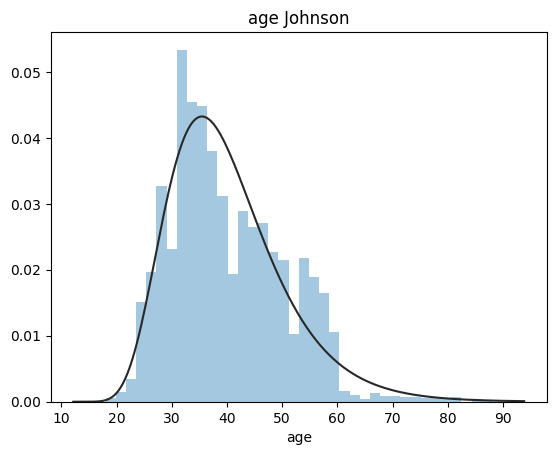

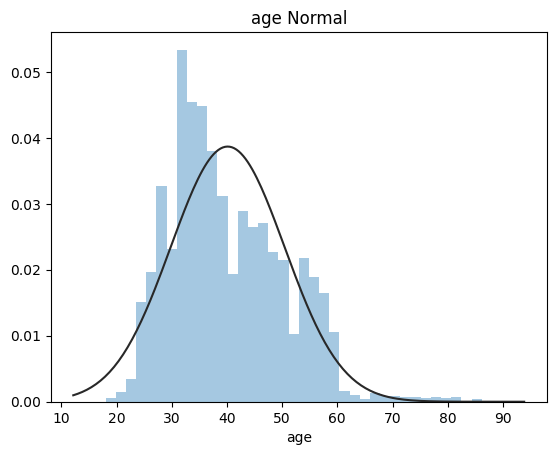

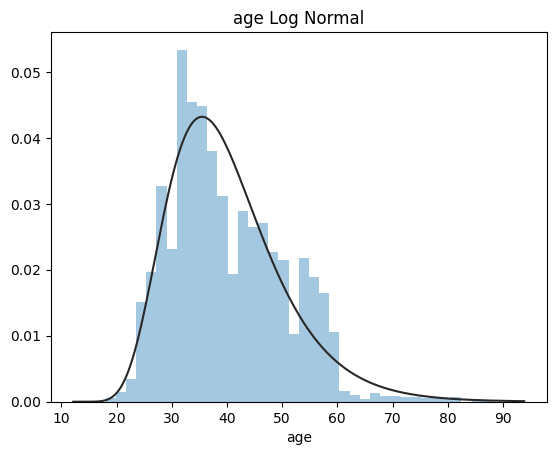

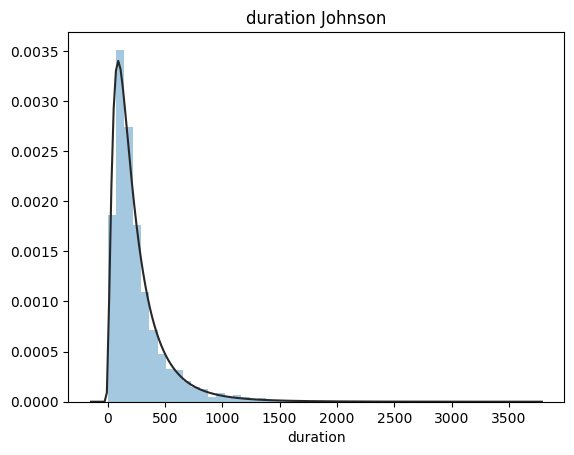

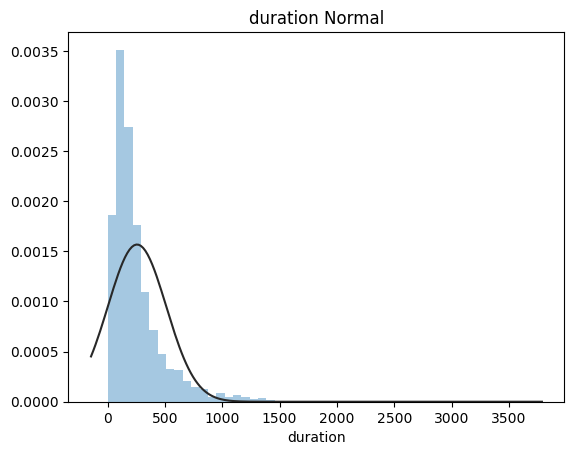

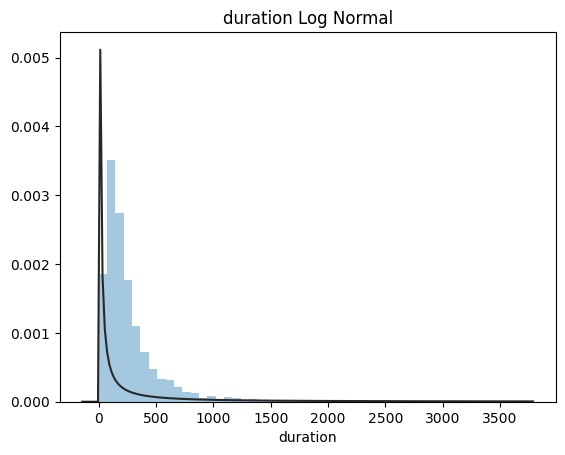

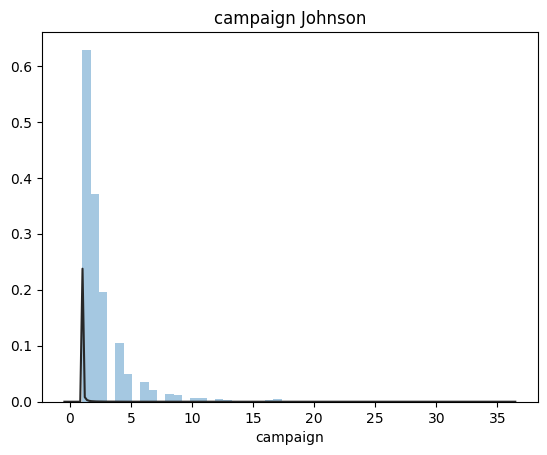

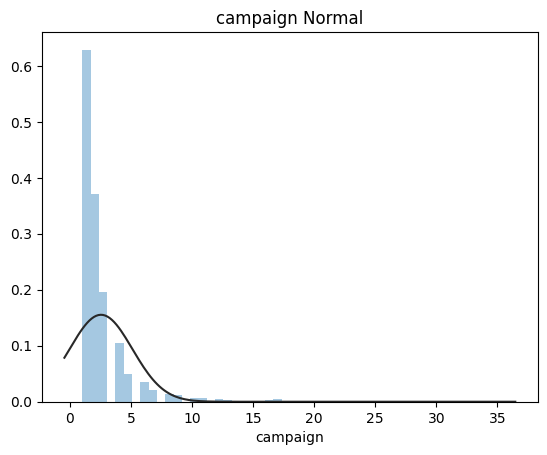

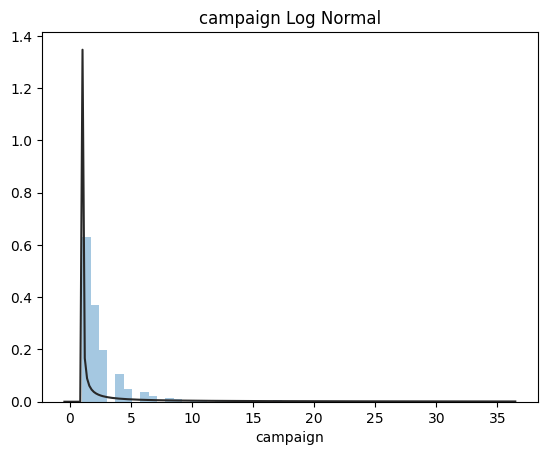

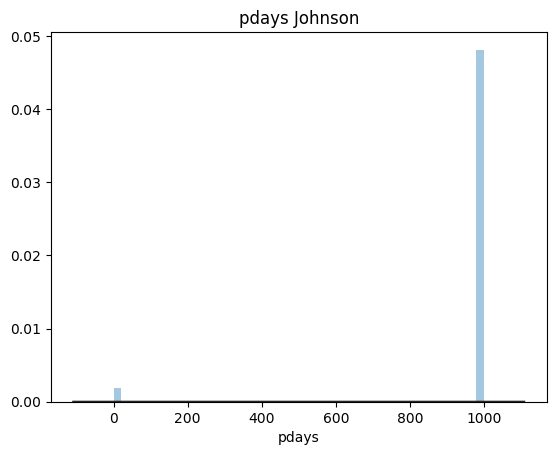

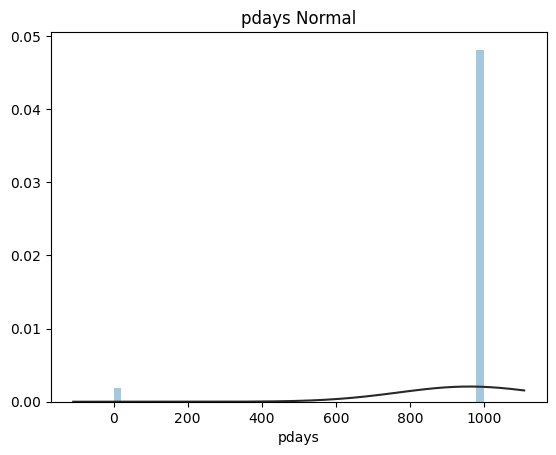

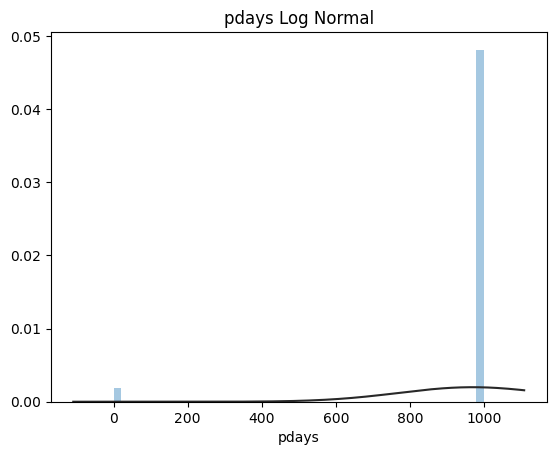

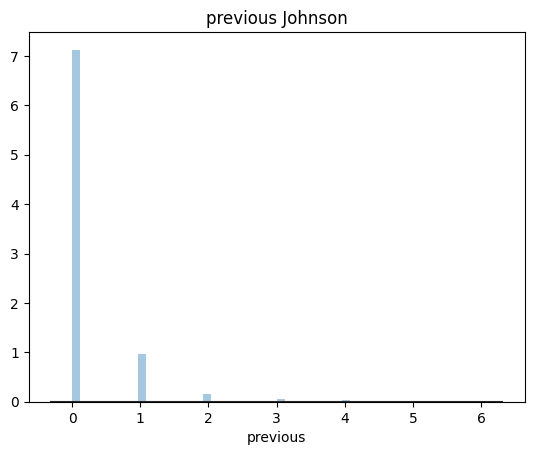

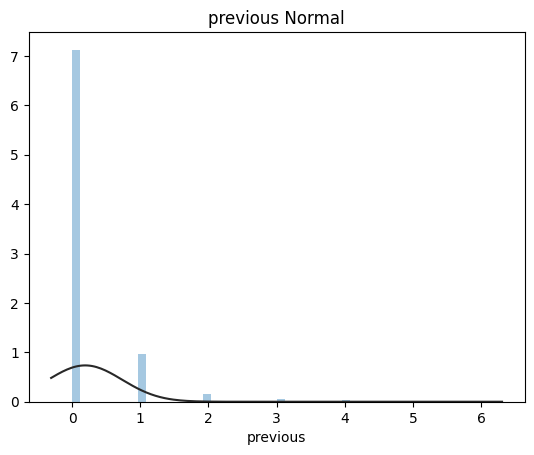

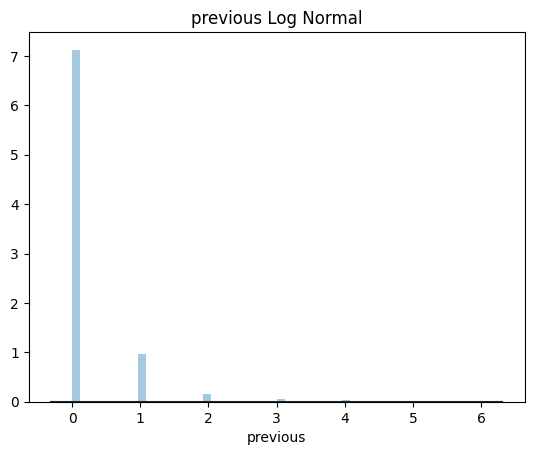

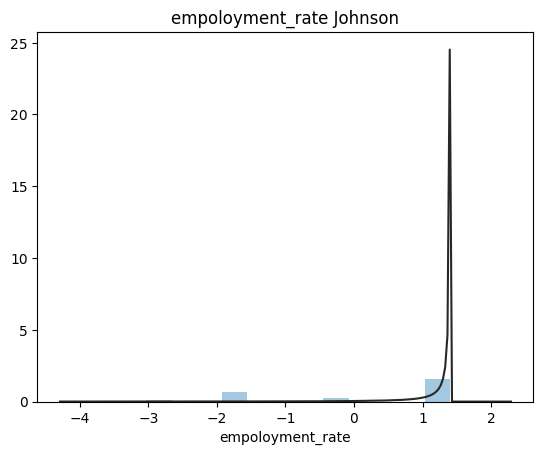

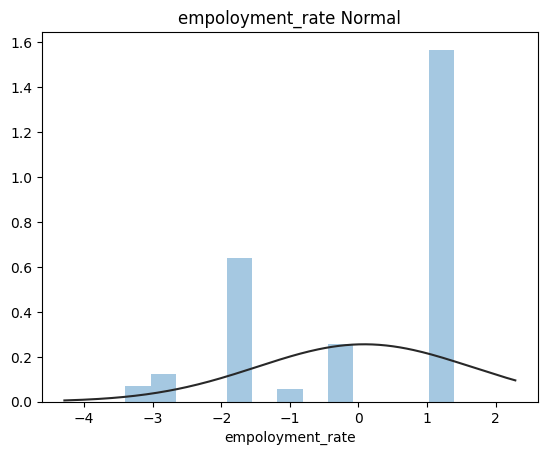

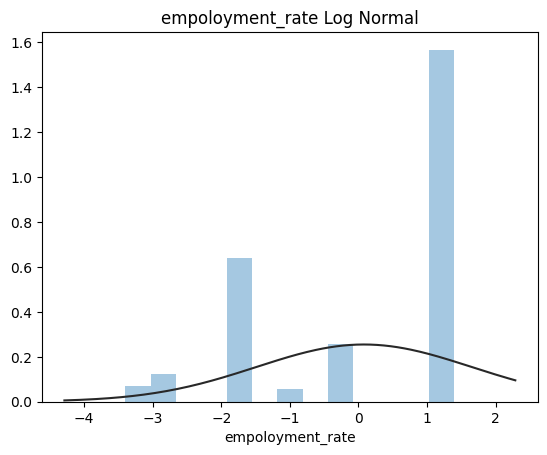

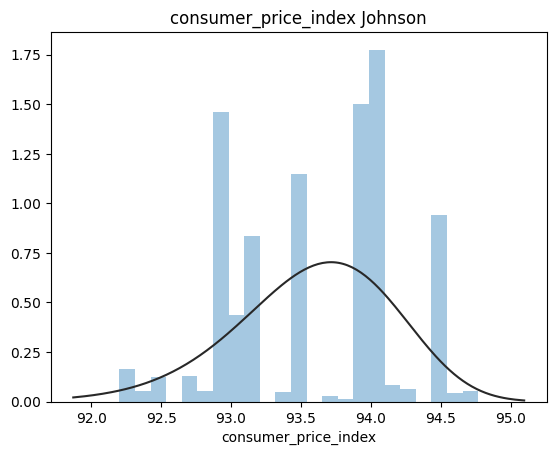

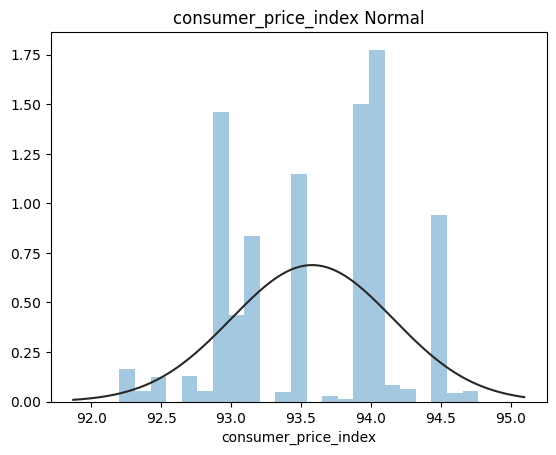

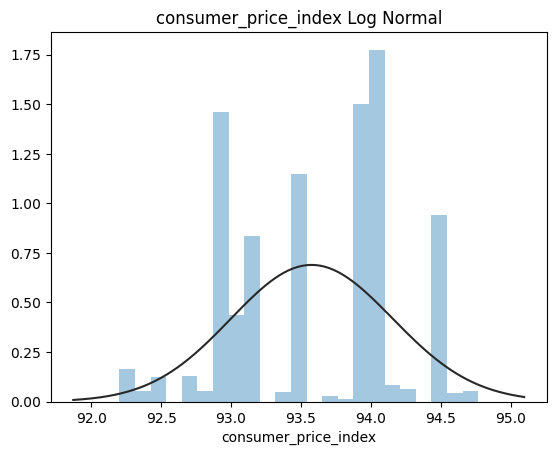

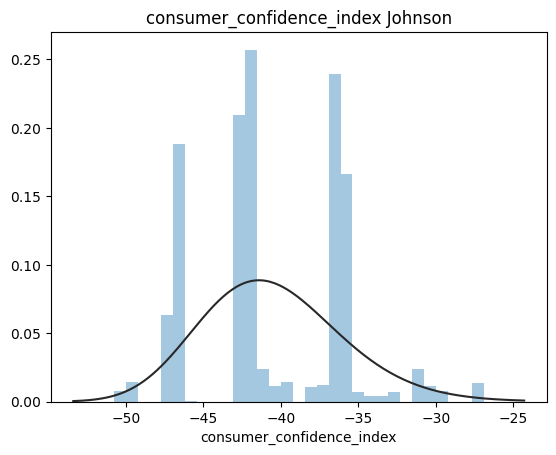

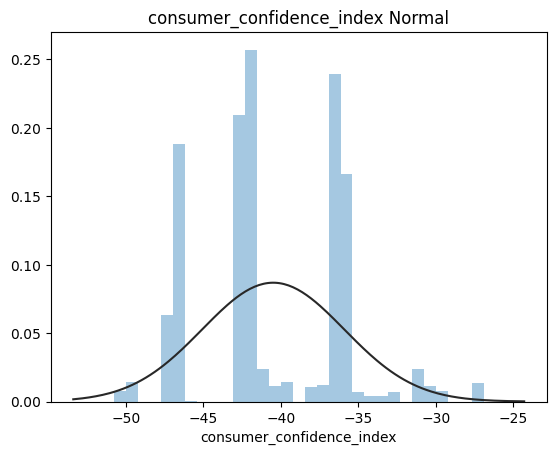

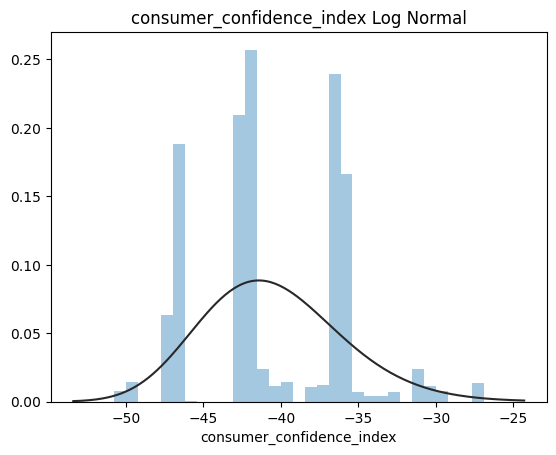

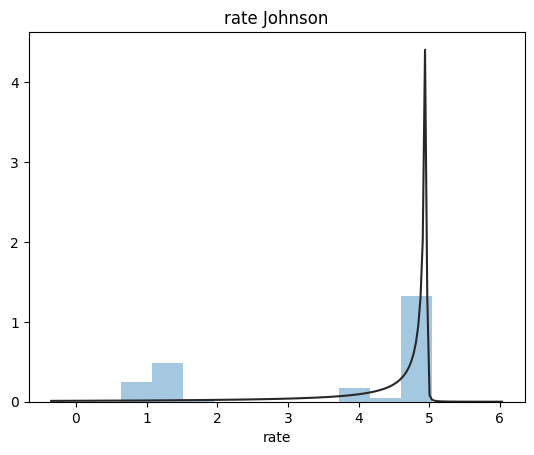

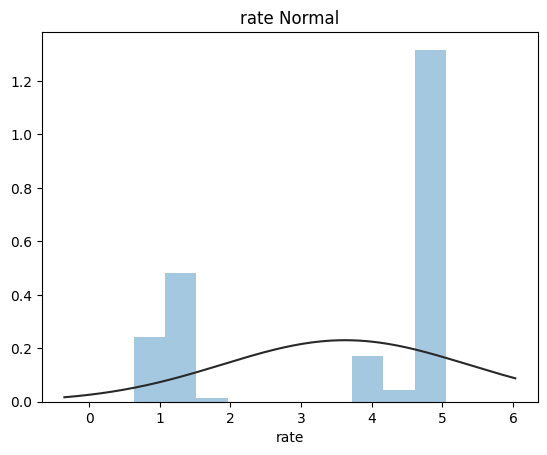

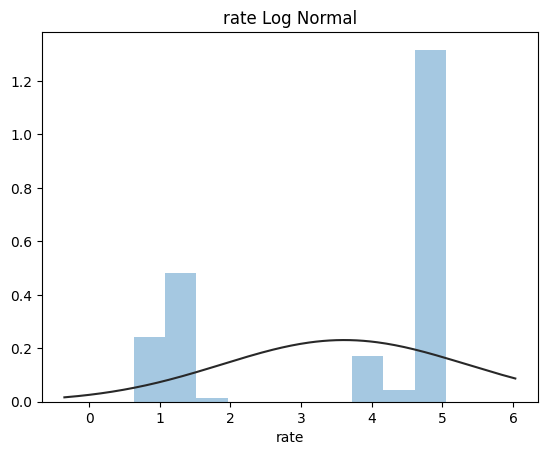

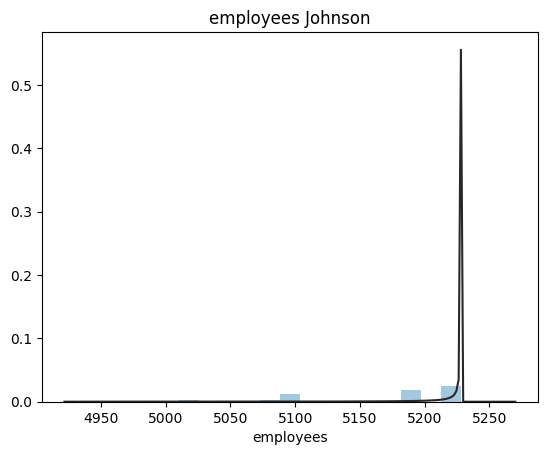

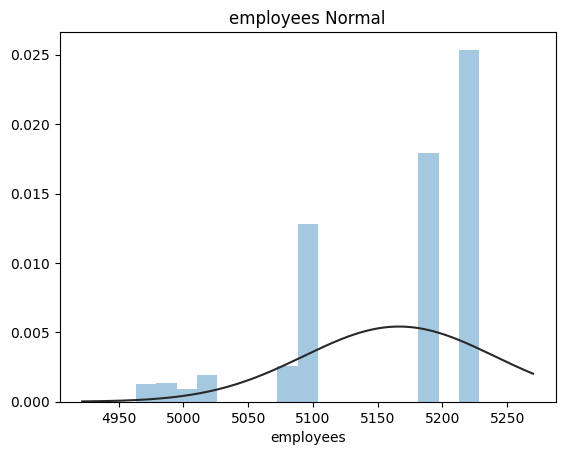

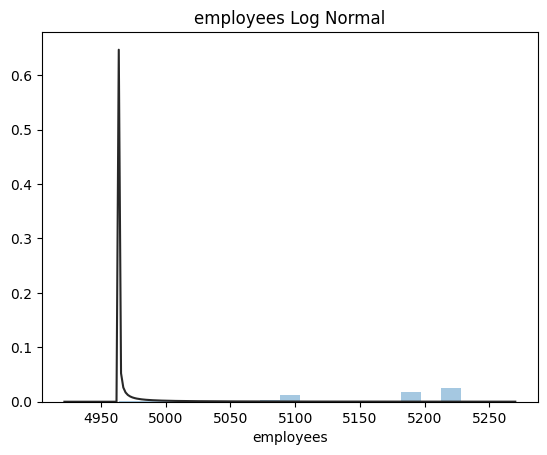

In [15]:
i=1
for column in data.columns:
    if is_numeric_dtype(data[column]):
        plt.figure(i); plt.title(column + ' Johnson')
        sns.distplot(data[column], kde=False, fit=st.johnsonsu)
        i+=1
        plt.figure(i); plt.title(column + ' Normal')
        sns.distplot(data[column], kde=False, fit=st.norm)
        i+=1
        plt.figure(i); plt.title(column + " Log Normal")
        sns.distplot(data[column], kde=False, fit=st.lognorm)
        i+=1

From the ouputs we notice that we have different outcomes for different columns with some of them having heavy assumetry, others being nearly normally distributed and others not conforming with any known distribution

---

Checking for corellations between columns to evaluate apparent relationships

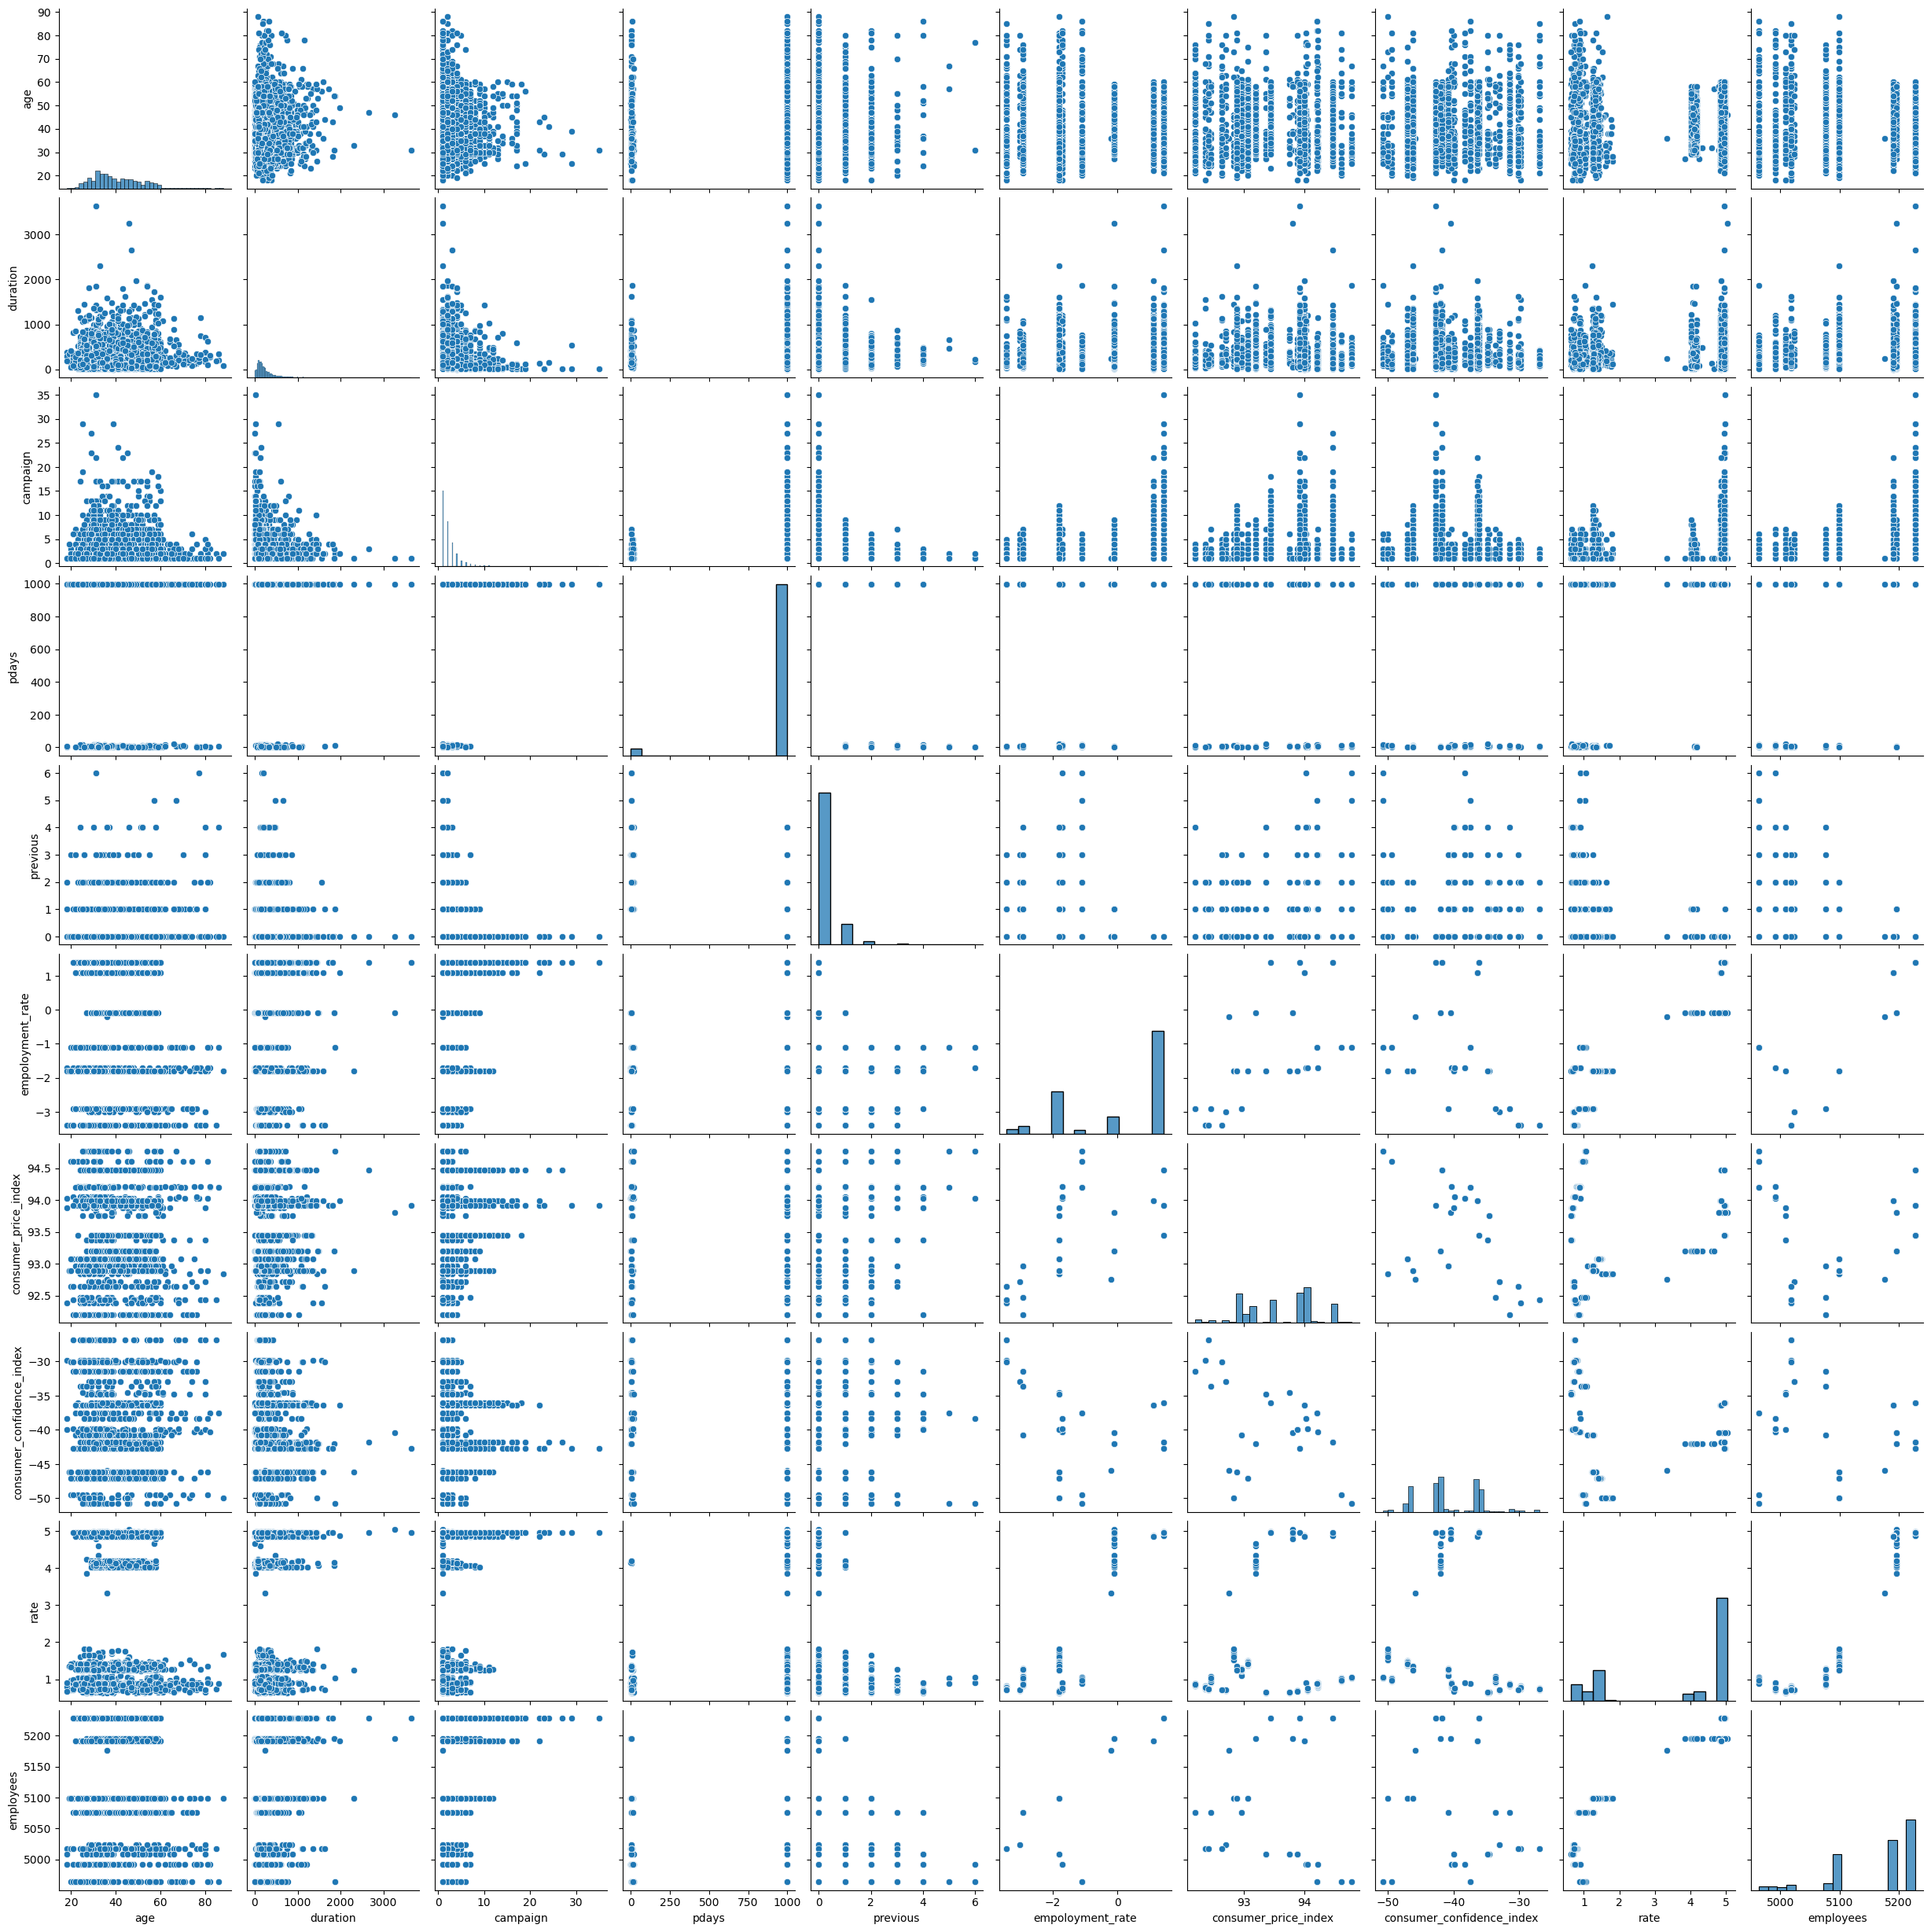

In [16]:
sns.pairplot(data)

---

Also creating a pairplot visualizing columns by separating the decision in a visual manner

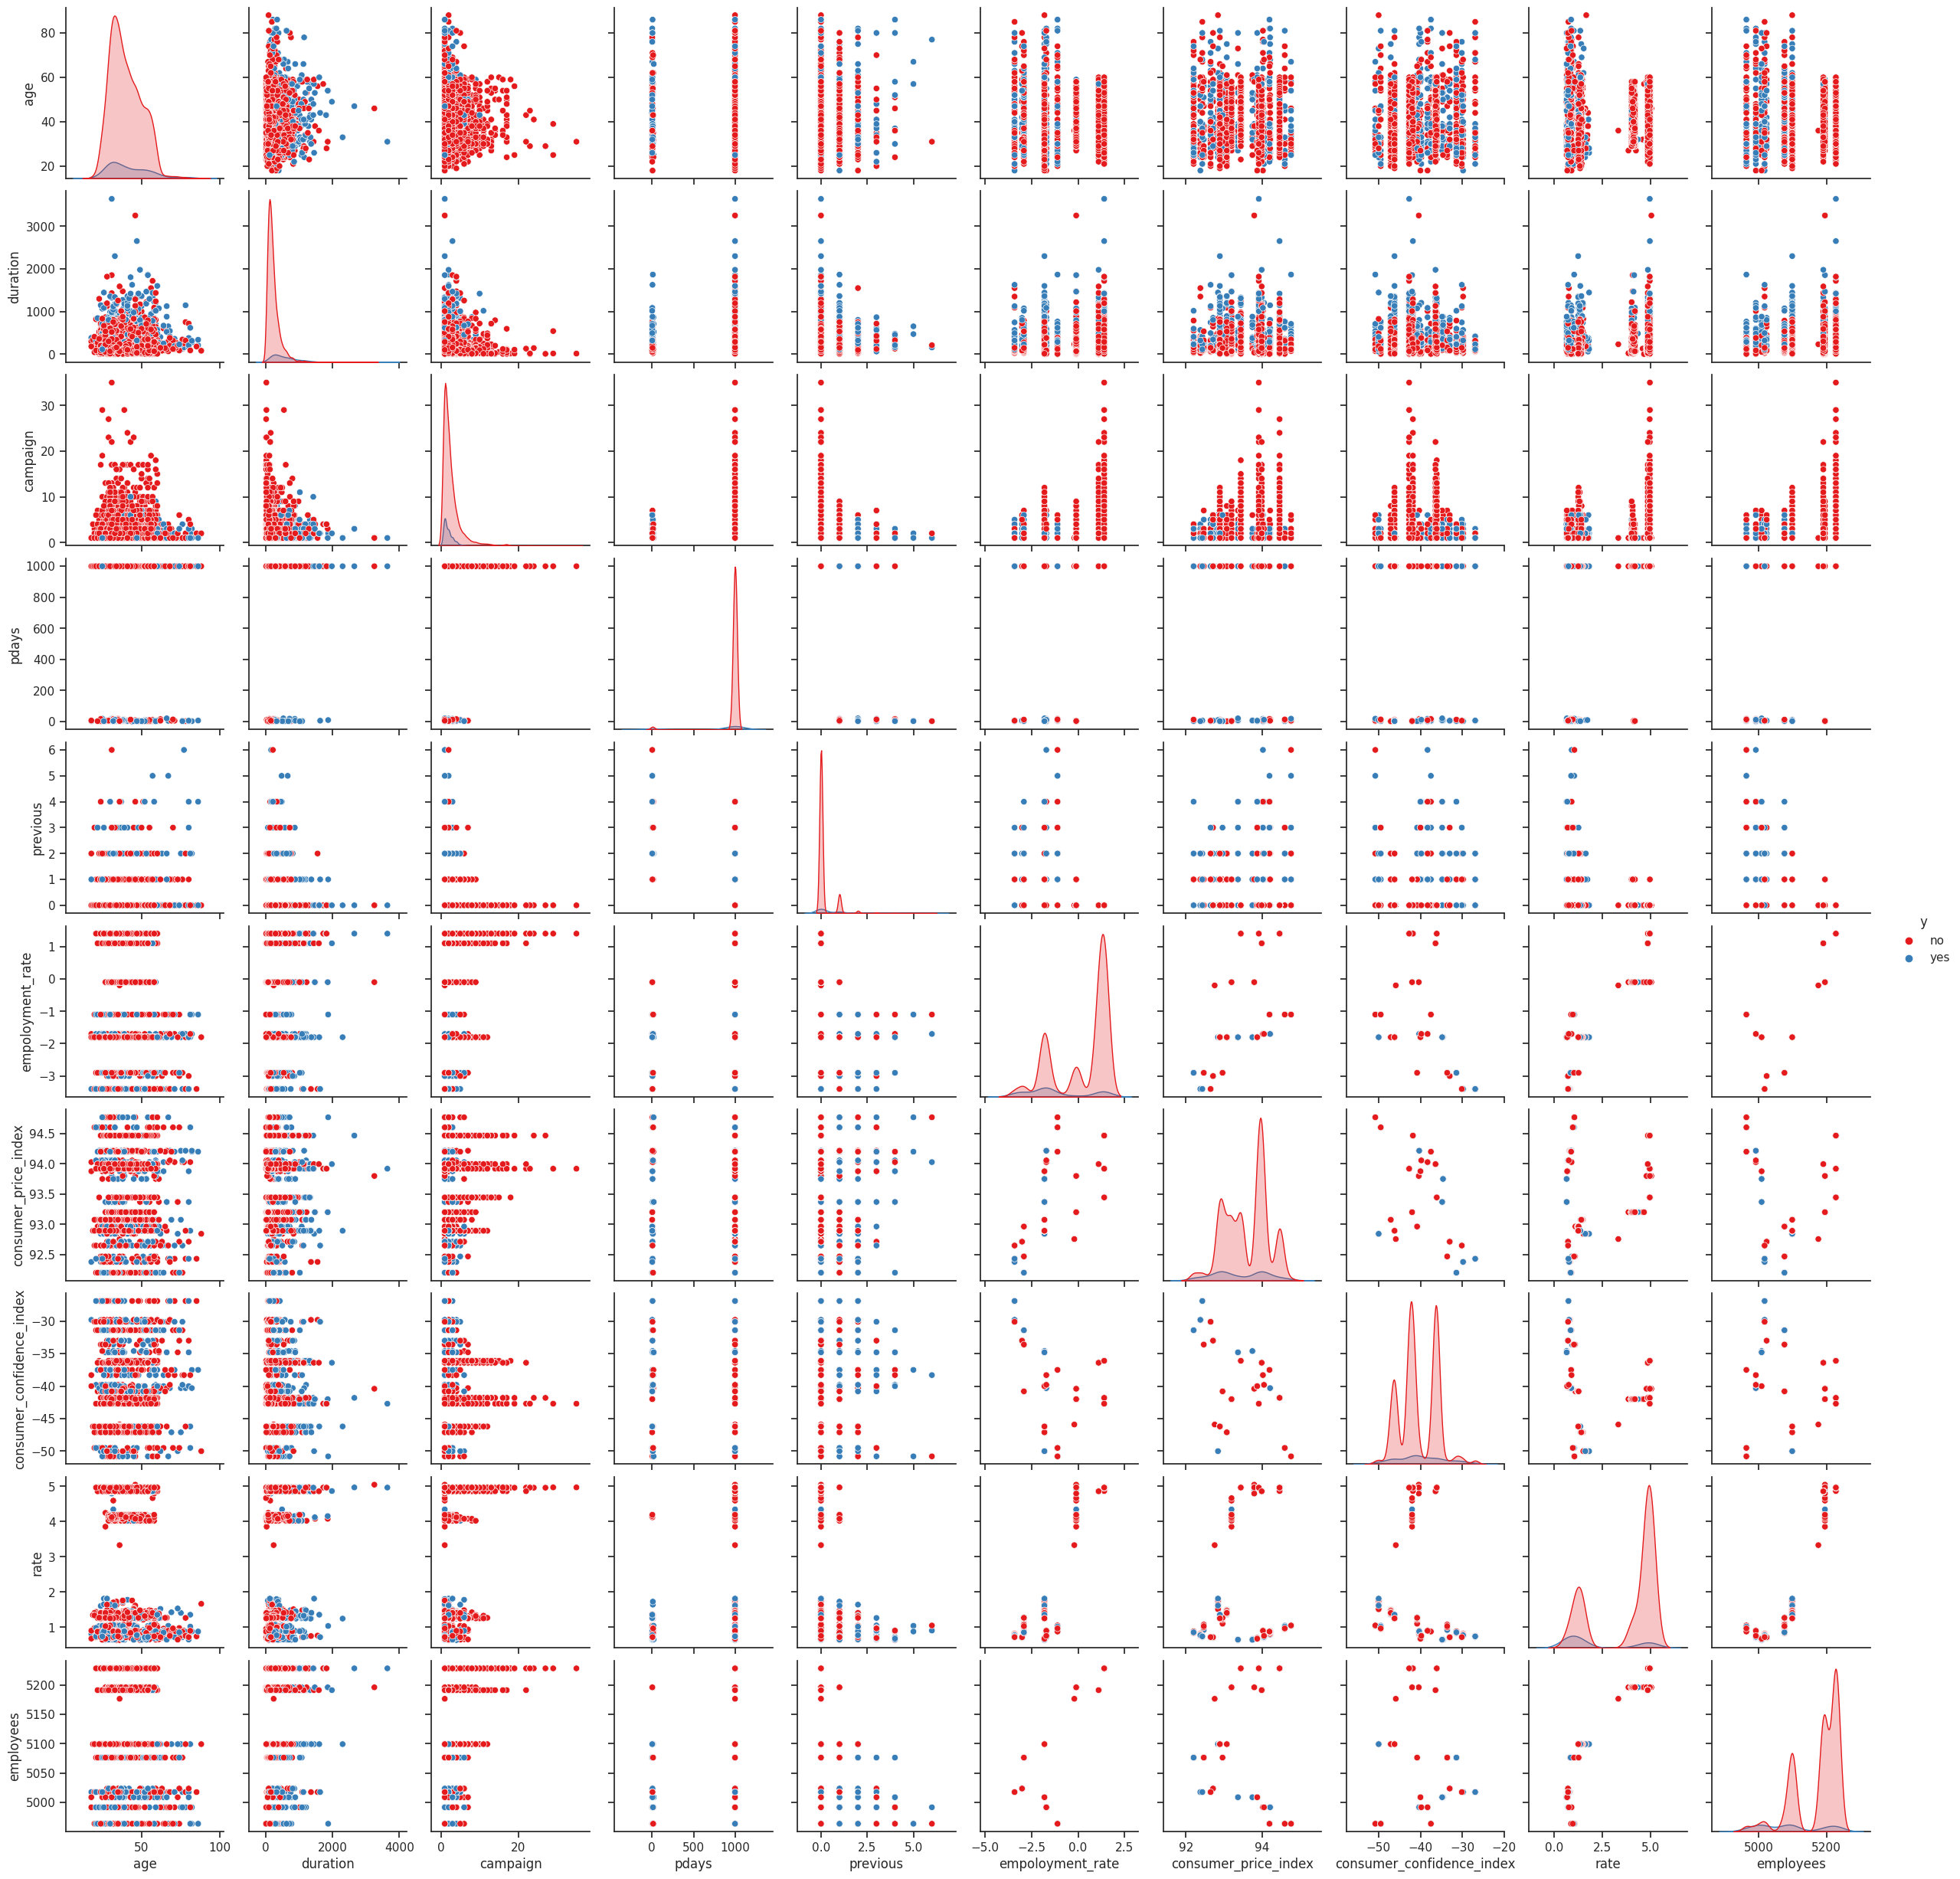

In [17]:
sns.set(style="ticks")

sns.pairplot(data, hue="y", palette="Set1")
plt.show()

---

Evaluating the correlation metrics

In [18]:
numeric = data.select_dtypes(include=[np.number])
correlation = numeric.corr()
for item in numeric:
    print(correlation[item])
    print("\n******-------------------******\n")

age                          1.000000
duration                     0.038178
campaign                    -0.013631
pdays                       -0.043454
previous                     0.051975
empoloyment_rate            -0.019036
consumer_price_index         0.000248
consumer_confidence_index    0.095539
rate                        -0.015143
employees                   -0.041770
Name: age, dtype: float64

******-------------------******

age                          0.038178
duration                     1.000000
campaign                    -0.084542
pdays                       -0.047194
previous                     0.026444
empoloyment_rate            -0.026404
consumer_price_index         0.019599
consumer_confidence_index   -0.038541
rate                        -0.030625
employees                   -0.042313
Name: duration, dtype: float64

******-------------------******

age                         -0.013631
duration                    -0.084542
campaign                     1.000000
p

---

Creating a heatmap to better visualise correlations

<AxesSubplot:>

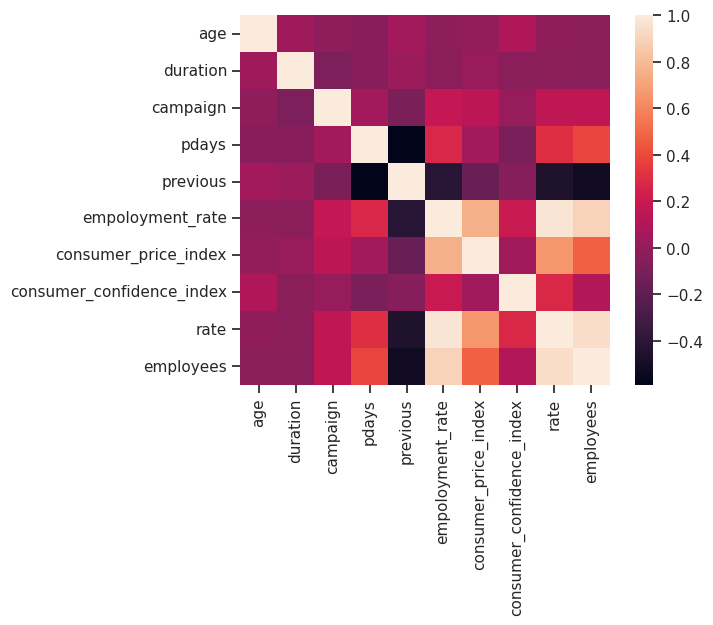

In [19]:
sns.heatmap(correlation,square = True)

We do not find any apparent correlations apart from columns that are naturally correlated (e.g. employees with rate)

---

Checking the decision vs categorical data

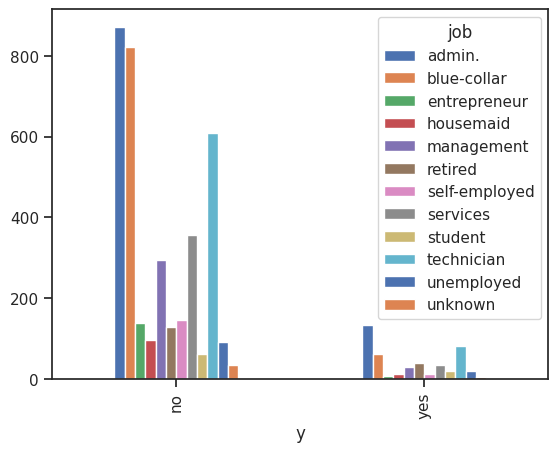

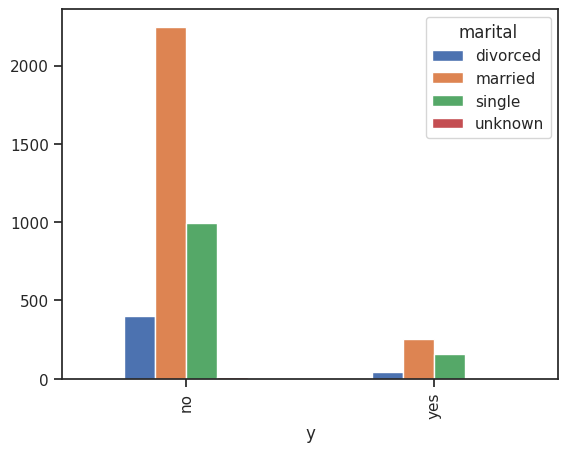

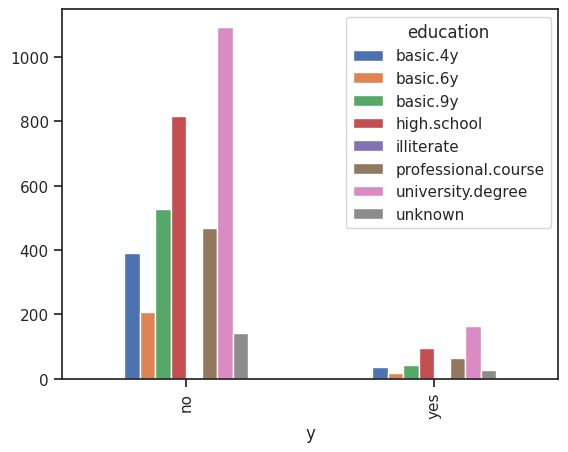

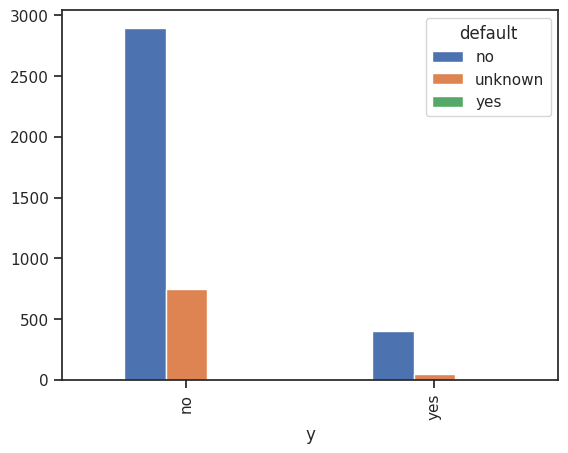

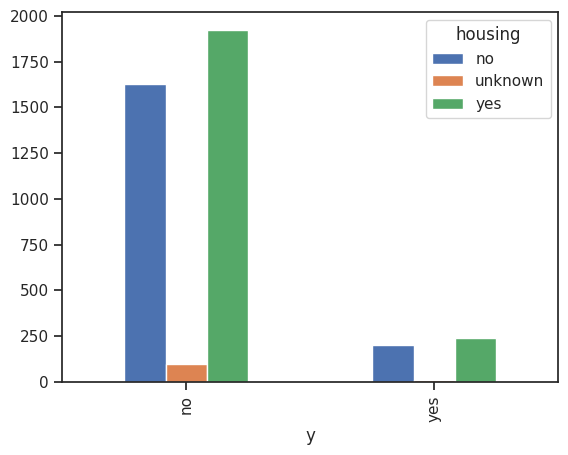

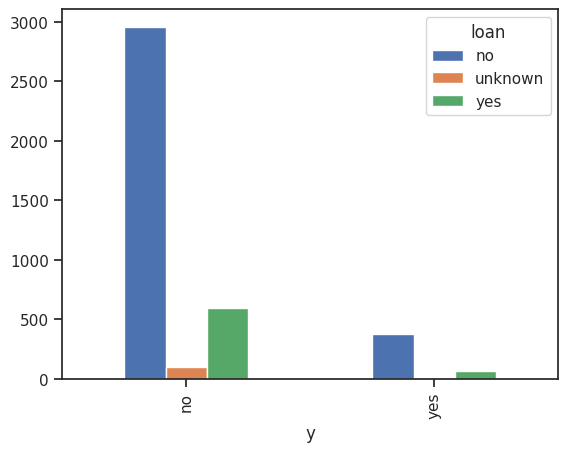

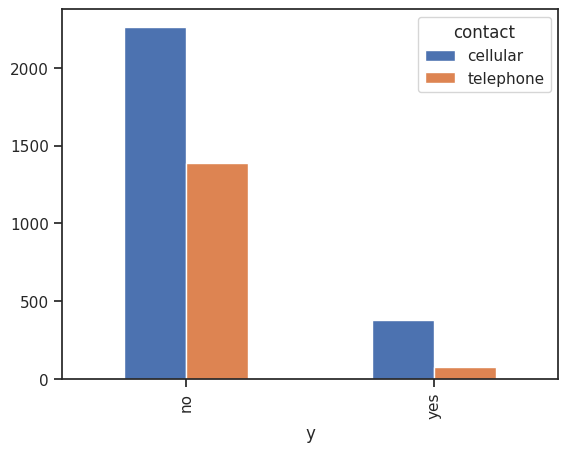

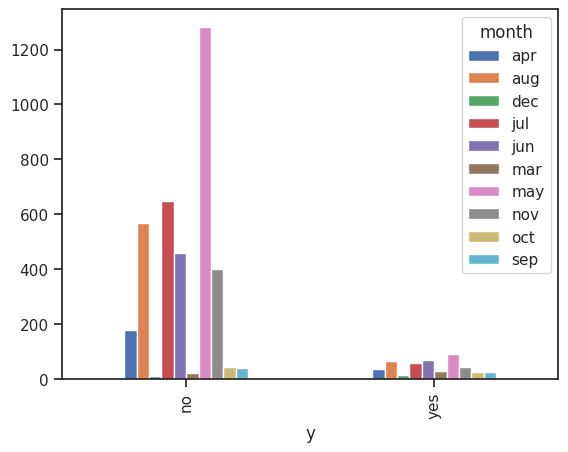

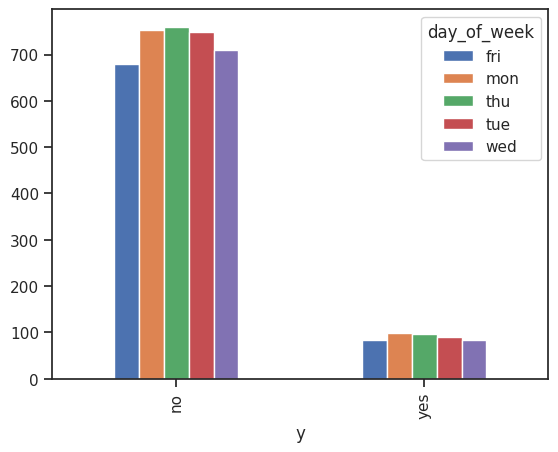

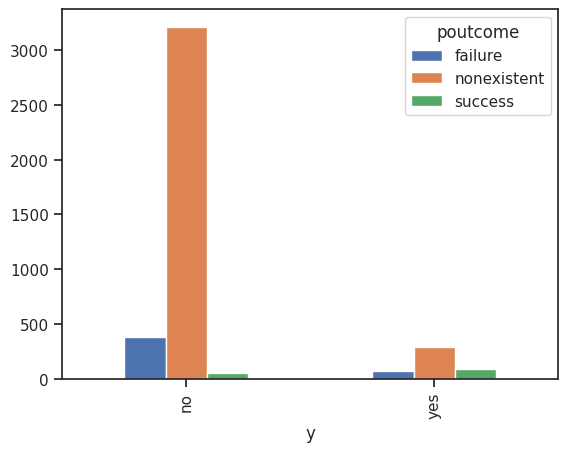

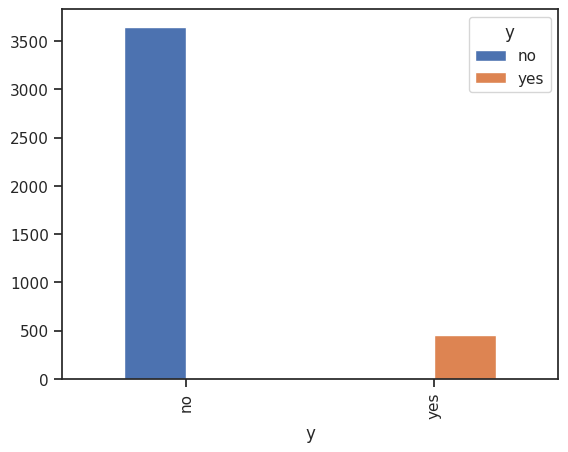

In [20]:
for column in data.columns:
    if not(is_numeric_dtype(data[column])):
        crosstab = pd.crosstab(index=data['y'],columns=data[column])
        crosstab.plot.bar()

---

Checking yes decision vs categorical data

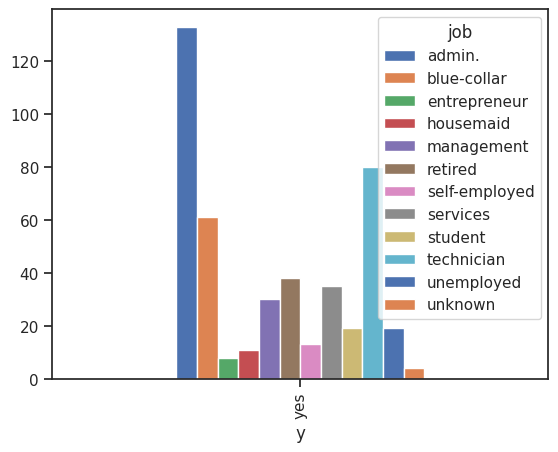

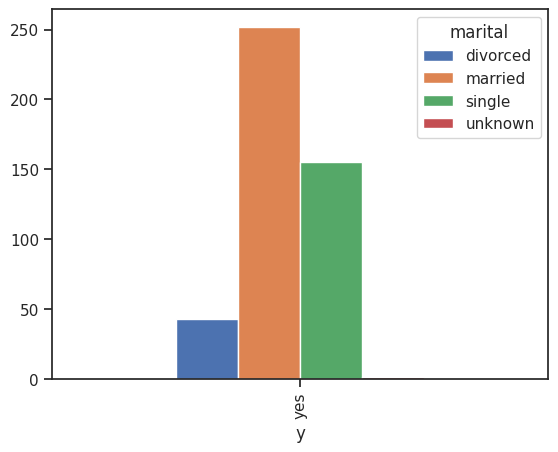

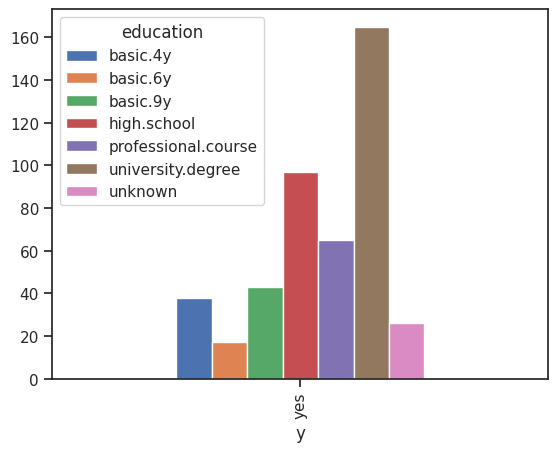

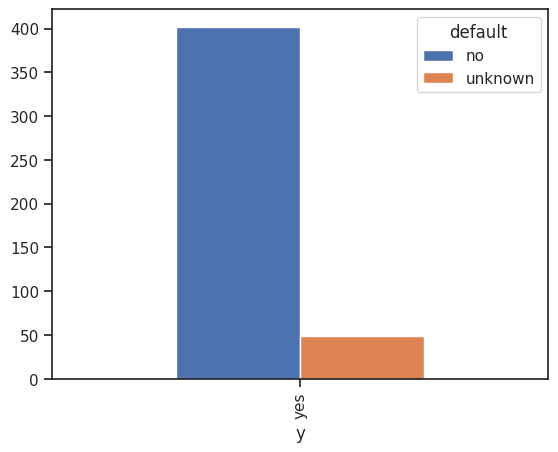

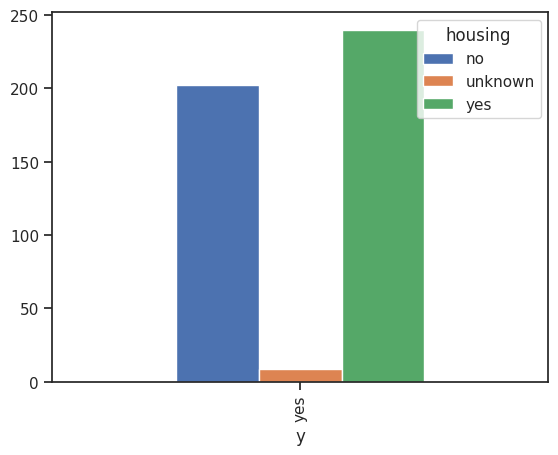

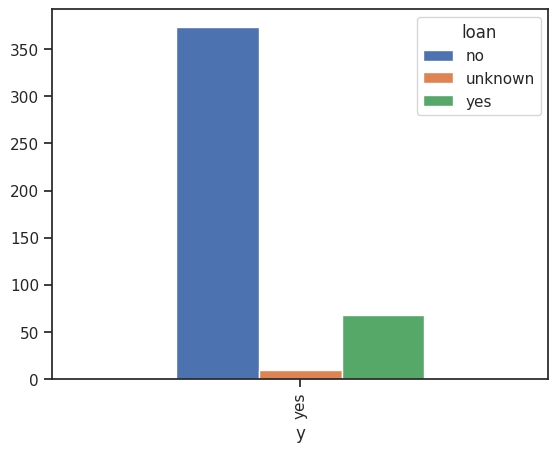

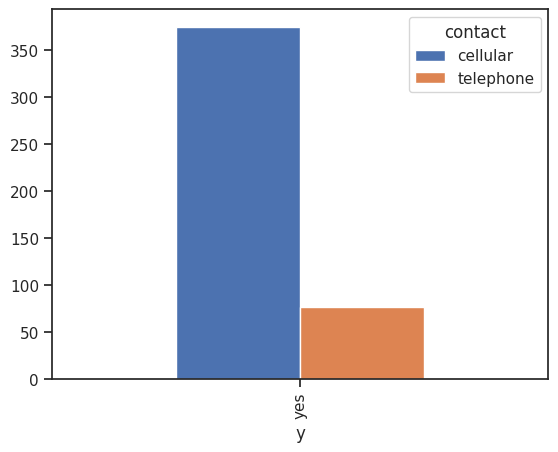

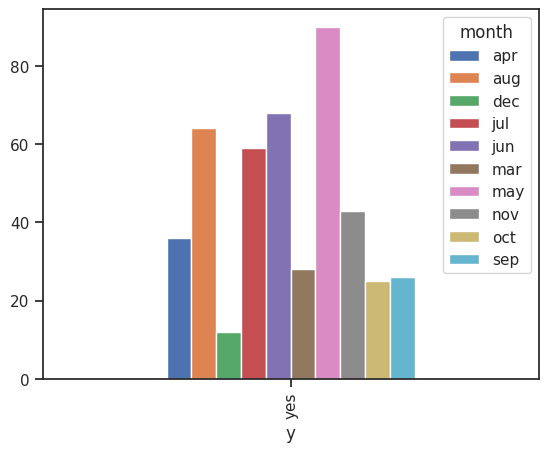

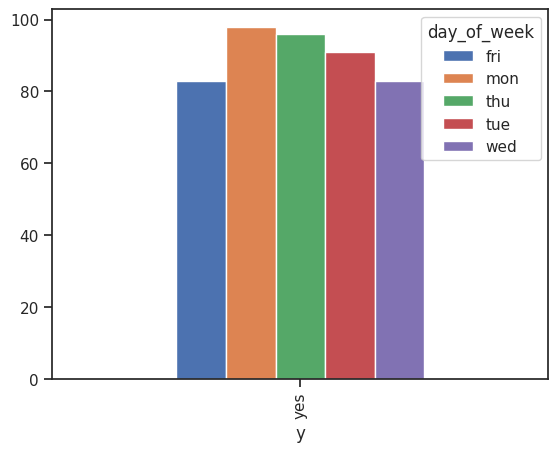

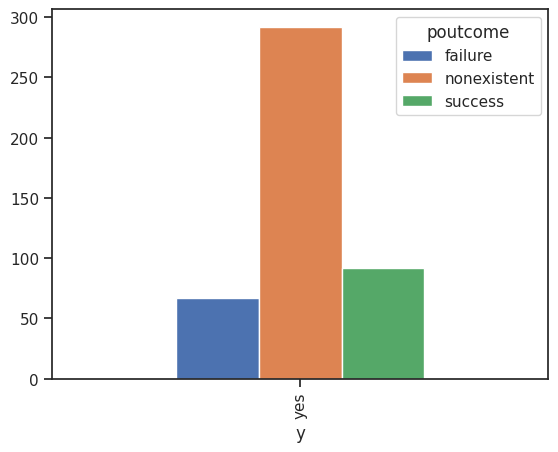

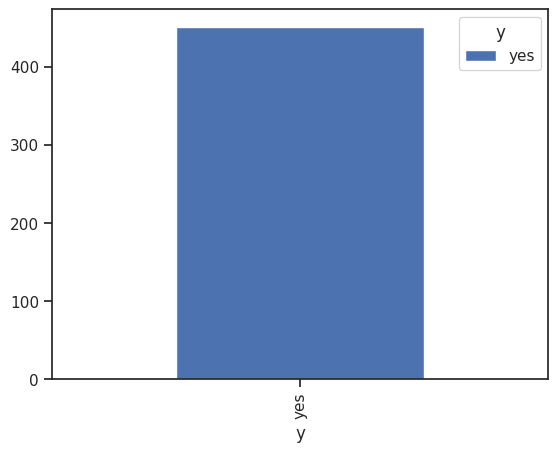

In [21]:
temp = data[data['y']=="yes"]
for column in temp.columns:
    if not(is_numeric_dtype(data[column])):
        crosstab = pd.crosstab(index=temp['y'],columns=temp[column])
        crosstab.plot.bar()

---

Exploring numerical data vs decision

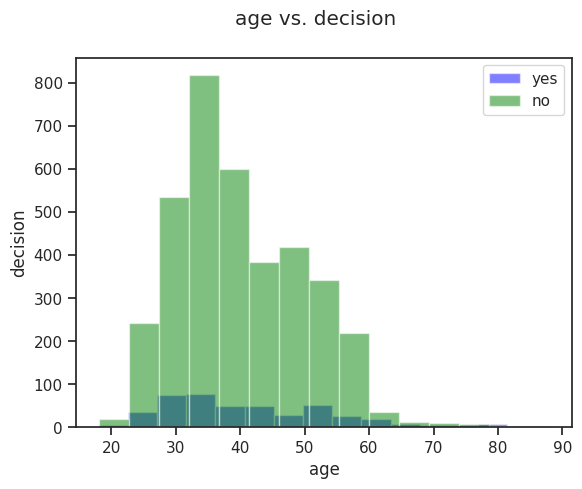

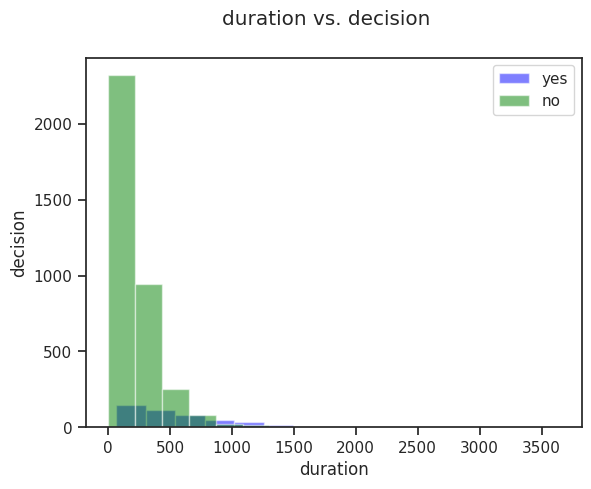

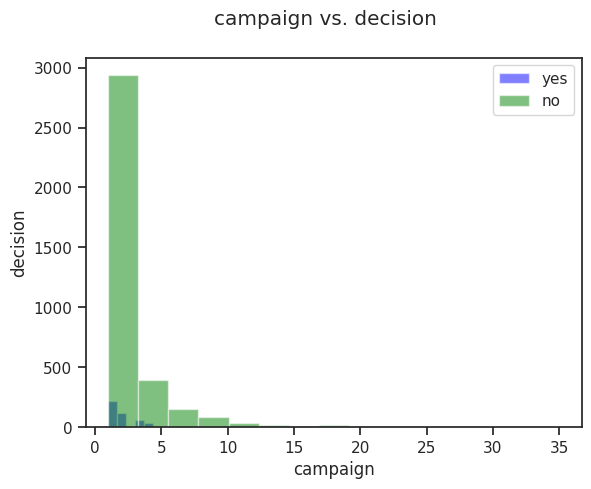

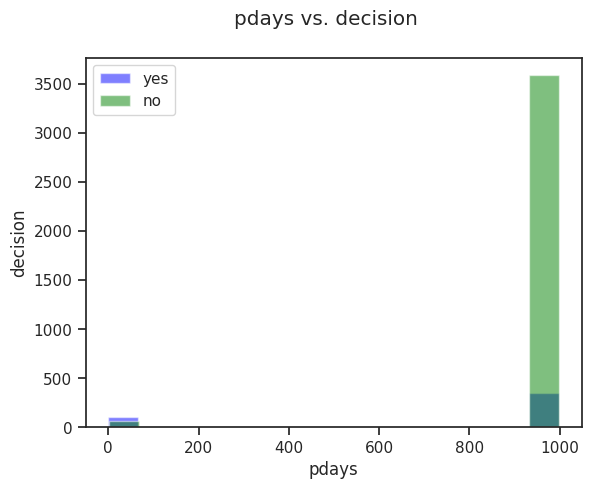

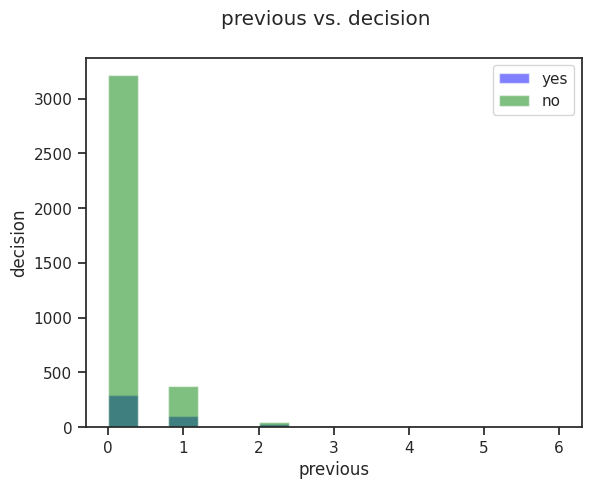

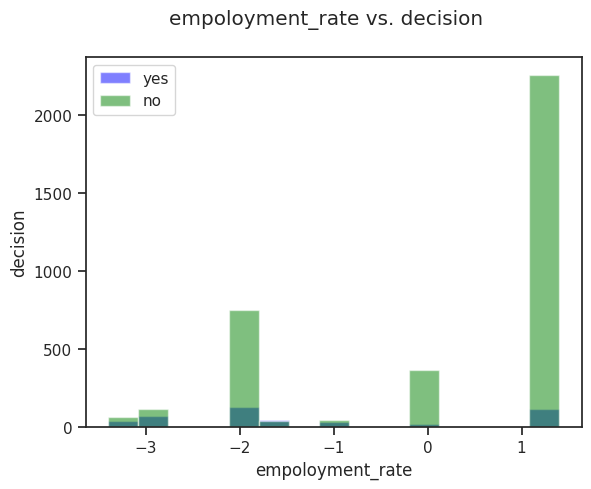

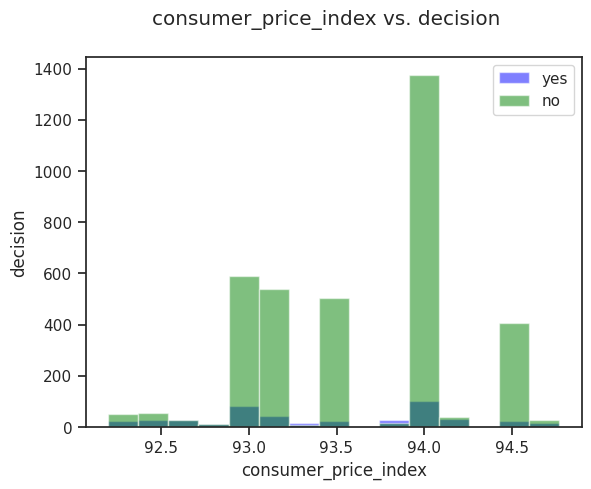

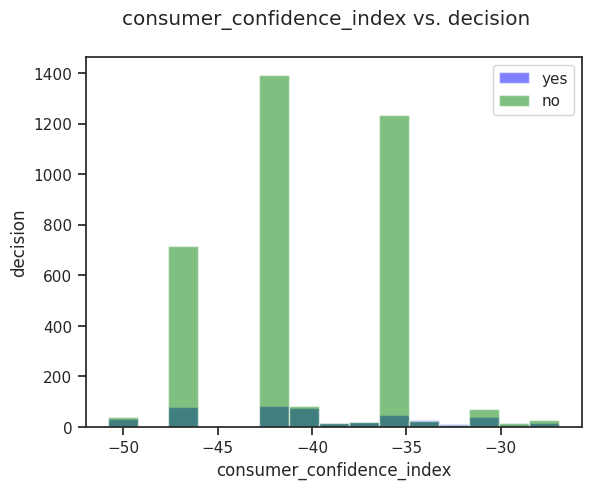

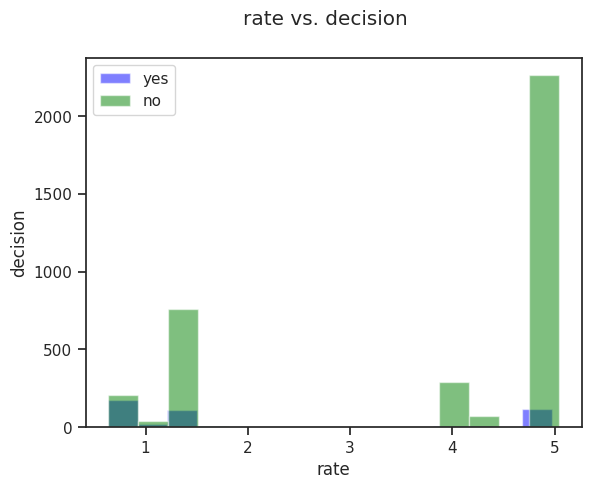

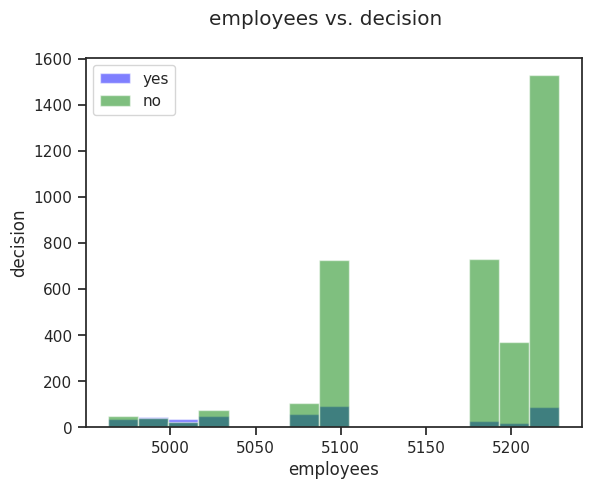

In [22]:
for column in data.columns:
    if is_numeric_dtype(data[column]):
        fig, ax = plt.subplots()
        ax.hist(data[data["y"]=="yes"][column], bins=15, alpha=0.5, color="blue", label="yes")
        ax.hist(data[data["y"]=="no"][column], bins=15, alpha=0.5, color="green", label="no")
        ax.set_xlabel(column)
        ax.set_ylabel("decision")
        fig.suptitle("{} vs. decision".format(column))
        ax.legend();



---

Exploring categorical data vs decision for yes decisions

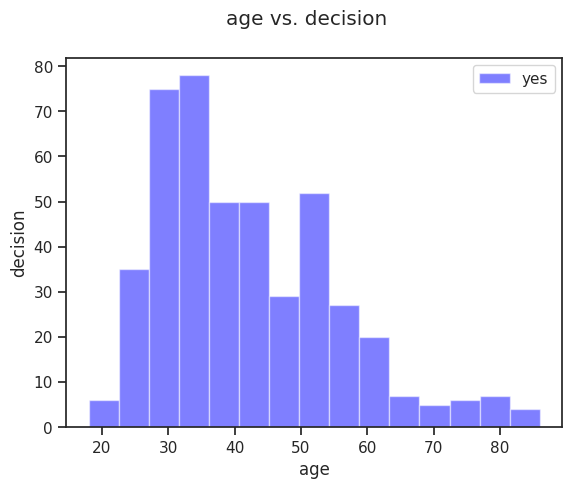

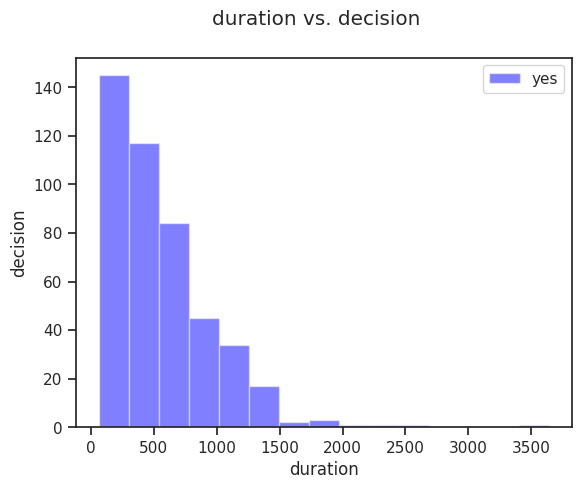

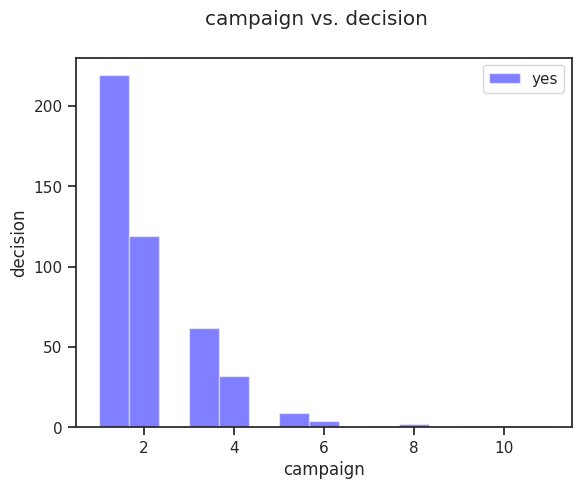

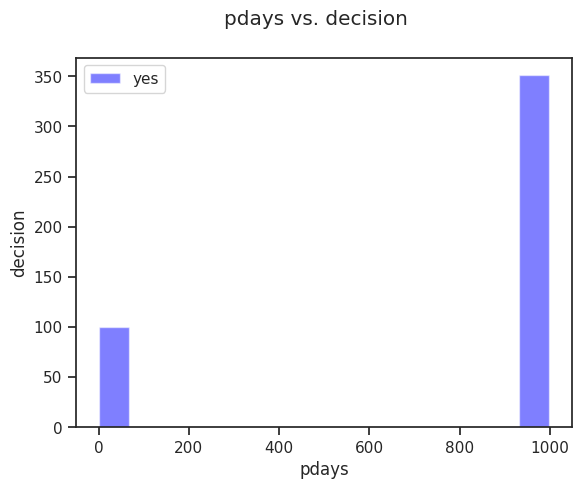

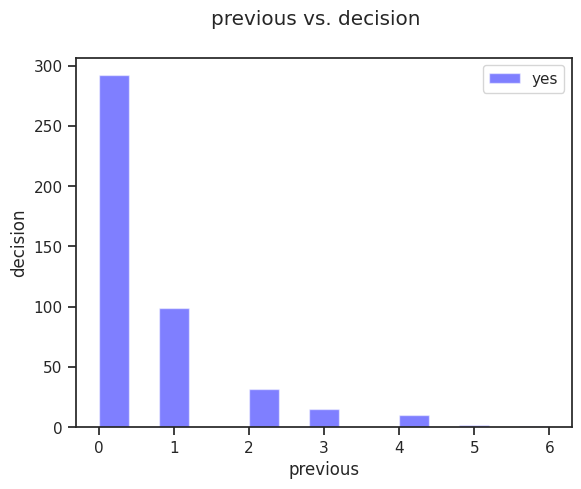

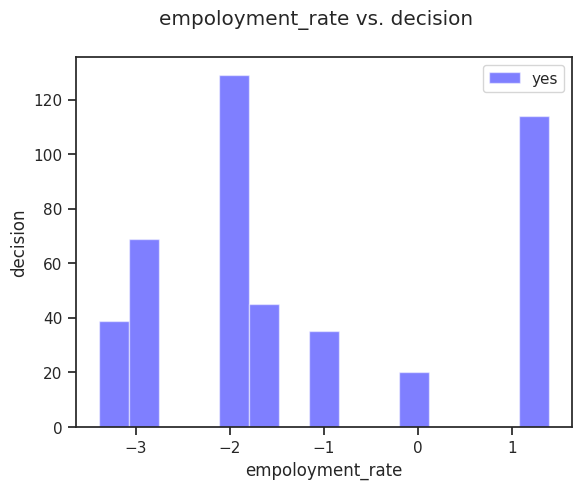

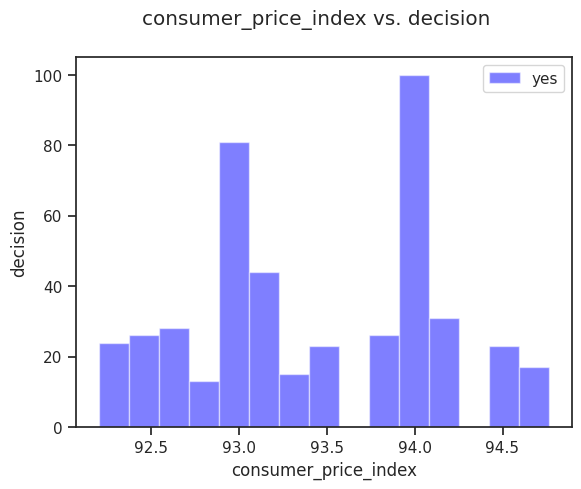

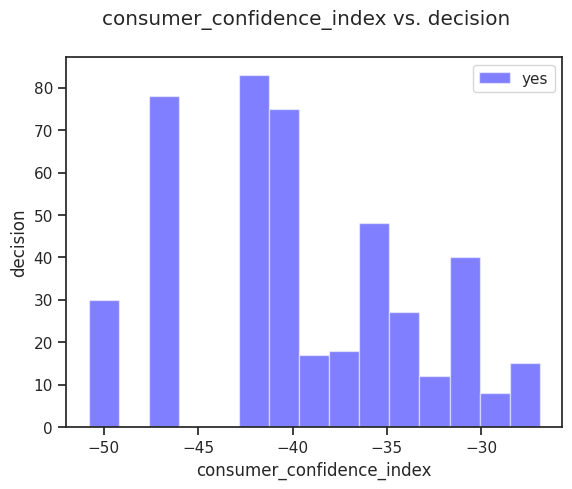

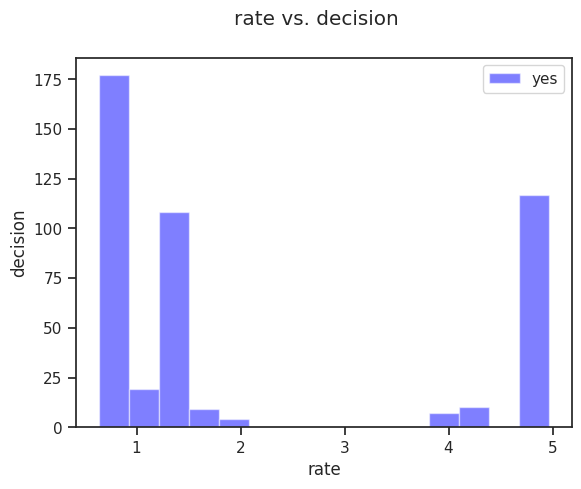

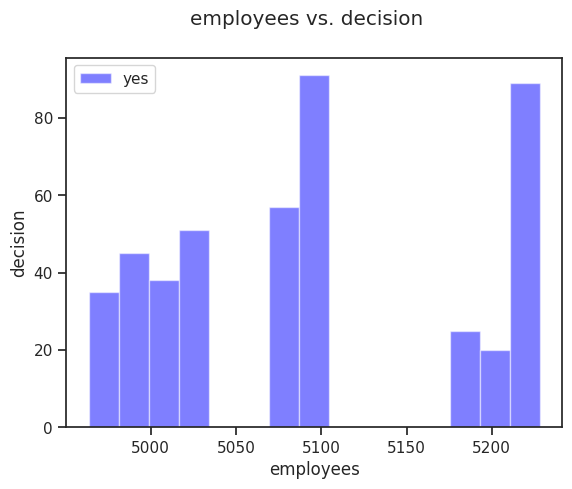

In [23]:
temp = data[data["y"]=="yes"]
for column in temp.columns:
    if is_numeric_dtype(data[column]):
        fig, ax = plt.subplots()
        ax.hist(temp[temp["y"]=="yes"][column], bins=15, alpha=0.5, color="blue", label="yes")
        ax.set_xlabel(column)
        ax.set_ylabel("decision")
        fig.suptitle("{} vs. decision".format(column))
        ax.legend();

---

Creating boxplots

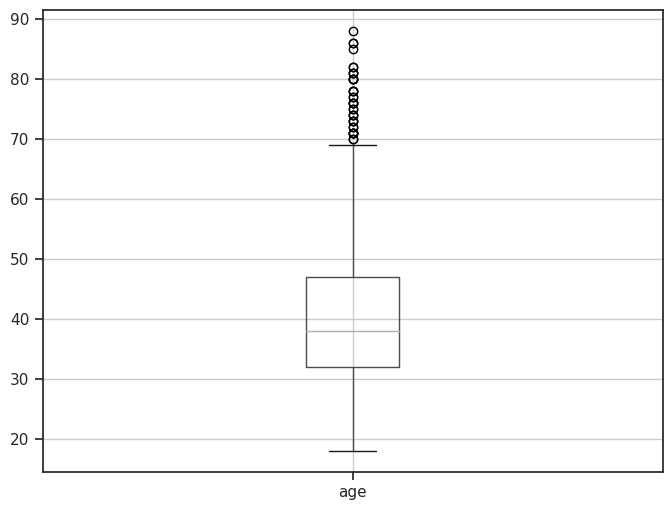

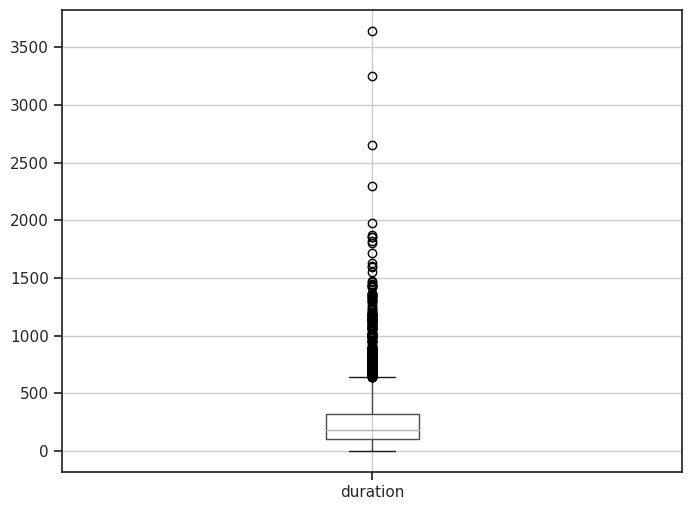

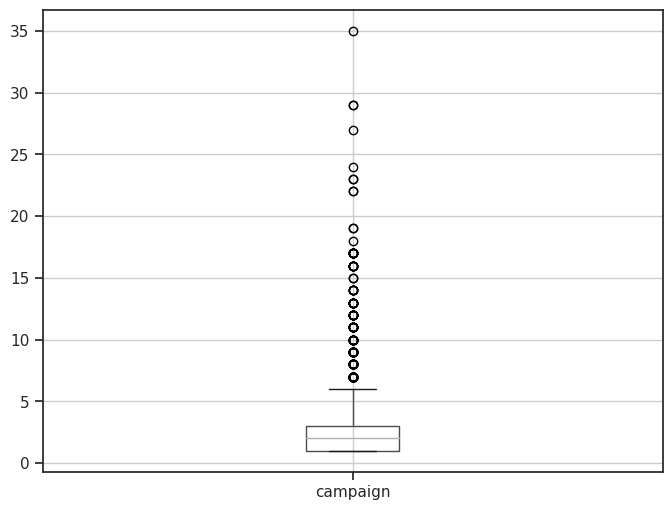

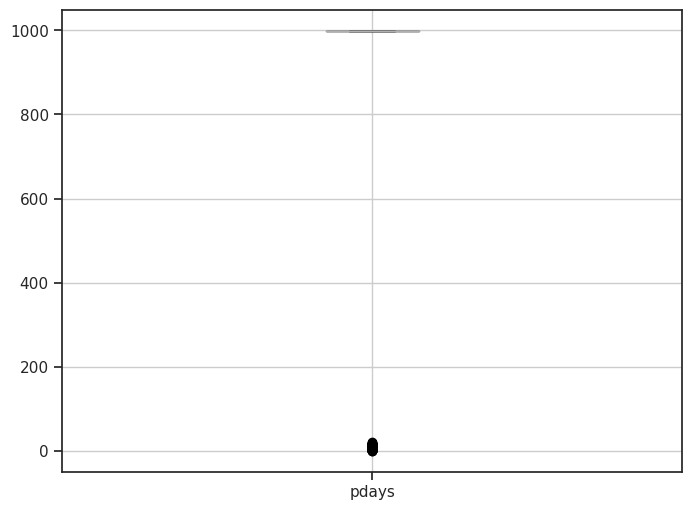

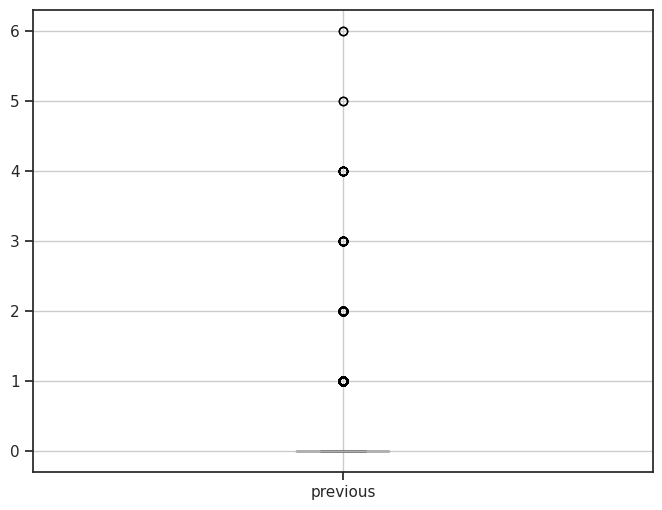

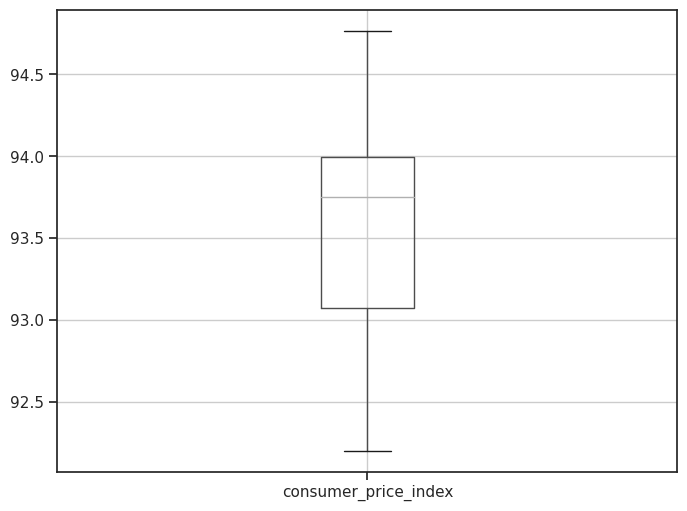

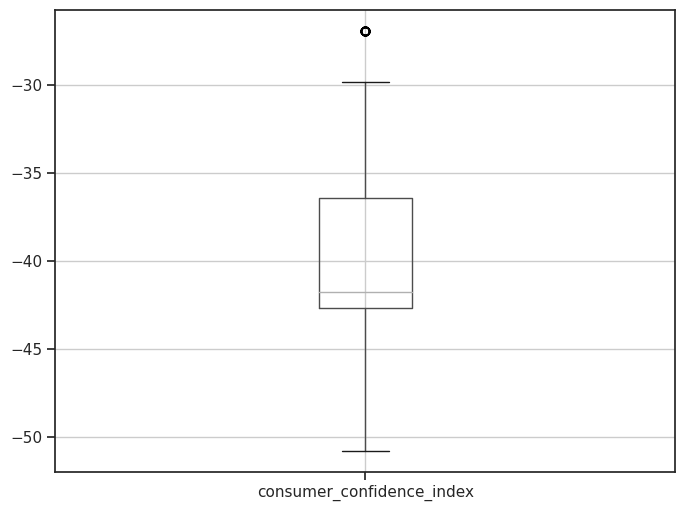

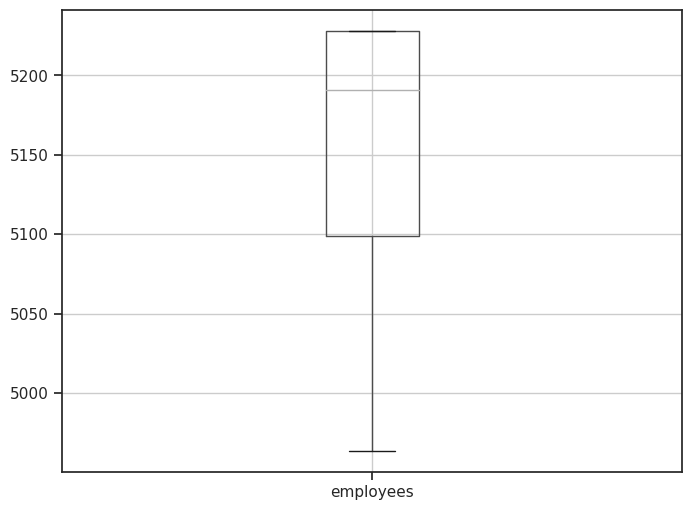

In [24]:
for column in data.columns:
    if is_numeric_dtype(data[column]):
        fig = plt.figure(figsize=(8,6))
        ax = fig.gca()
        data.boxplot(column=column, ax=ax)

---

# Projections

Changing the categorical values of yes, no in the "y" column to "yes"=1 and "no"=0

In [25]:
data2 = data.copy(deep=True)

In [26]:
decision = [1 if i == 'yes' else 0
    for i in data['y']]
data2["decision"]=decision
data2.drop(columns='y', inplace=True)

---

Changing columns with yes/no (despite having unknown)

In [27]:
temp = ['loan', 'housing', 'default']
for col in temp:
    data2[col + '_bool'] = [1 if i == 'yes' else 0 for i in data[col]]
data2.drop(columns=temp, inplace=True)

---
Changing days and months to numeric values

In [28]:
mon = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
for item in mon:
    data2['month'] = data2['month'].replace(item, mon.index(item))

day = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
for item in day:
    data2['day_of_week'] = data2['day_of_week'].replace(item, day.index(item))

---

One-hot-encoding in categorical values where # of cat>2

In [29]:

cat_columns = ['job', 'marital', 'education', 'contact', 'poutcome']

for col in  cat_columns:
    data2 = pd.concat([data2.drop(col, axis=1),
                            pd.get_dummies(data2[col], prefix=col, prefix_sep='_',
                                           drop_first=True, dummy_na=False)], axis=1)

---
Creating y,x values for target variable vs train, test, validation dataset

In [30]:
X = data2.loc[:,data2.columns!='decision']
y = data2['decision']

---
## LR

Best LR model found from exhaustive search

In [31]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size =0.2, random_state=3)
lr = LogisticRegression()
lr.fit(X_train_lr, y_train_lr)
lr.score(X_test_lr, y_test_lr)
pred_lr = lr.predict(X_test_lr)
mer = metrics.precision_score(
 y_test_lr, pred_lr
)
print(mer)

0.6212121212121212


<AxesSubplot:xlabel='Actual'>

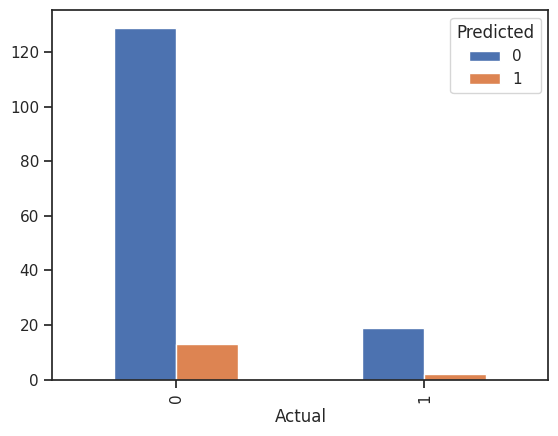

In [32]:
y_test_lr.rename('Actual', inplace=True)
series = pd.Series(pred_lr)
series.rename('Predicted',inplace=True)
CrosstabResult=pd.crosstab(index=y_test_lr,columns=series)
CrosstabResult.plot.bar()

---

## LinearSVC

Best LinearSVC model found from exhaustive search

In [33]:
X_train_sv, X_test_sv, y_train_sv, y_test_sv = train_test_split(X, y, test_size =0.2, random_state=3)
svm=LinearSVC()
svm.fit(X_train_sv, y_train_sv)
svm.score(X_test_sv, y_test_sv)
pred_sv = svm.predict(X_test_sv)
mer = metrics.precision_score(
 y_test_sv, pred_sv
)
mer

0.6111111111111112

<AxesSubplot:xlabel='Actual'>

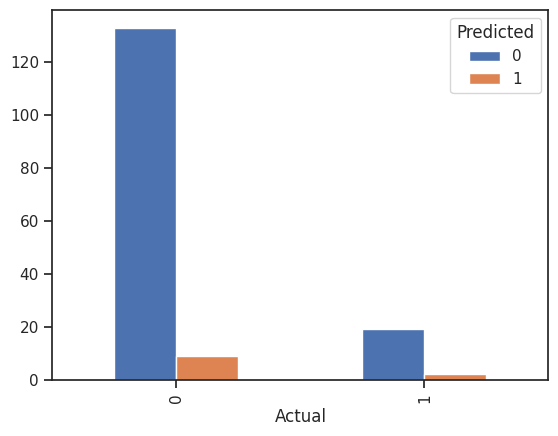

In [34]:
y_test_sv.rename('Actual', inplace=True)
series = pd.Series(pred_sv)
series.rename('Predicted',inplace=True)
CrosstabResult=pd.crosstab(index=y_test_sv,columns=series)
CrosstabResult.plot.bar()

---
## KNeighborsClassifier


Best KNeighborsClassifier model found from exhaustive search

In [35]:
X_train_kn, X_test_kn, y_train_kn, y_test_kn = train_test_split(X, y, test_size =0.2, random_state=3)
knn = KNeighborsClassifier(n_neighbors=8, algorithm = 'ball_tree', weights='uniform', leaf_size=10, p=2 )
knn.fit(X_train_kn, y_train_kn)
knn.score(X_test_kn, y_test_kn)
pred_kn = knn.predict(X_test_kn)
mer = metrics.precision_score(
 y_test_kn, pred_kn
)
mer

0.6333333333333333

<AxesSubplot:xlabel='Actual'>

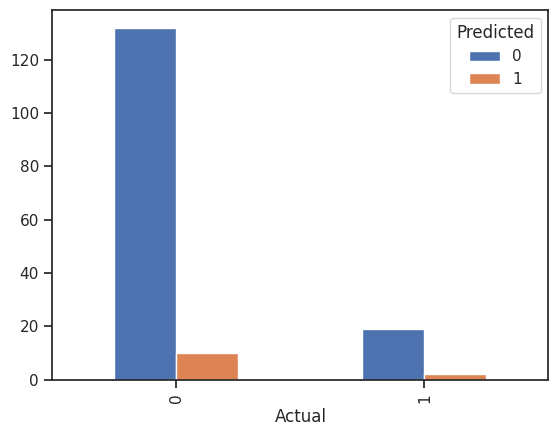

In [36]:
y_test_kn.rename('Actual', inplace=True)
series = pd.Series(pred_kn)
series.rename('Predicted',inplace=True)
CrosstabResult=pd.crosstab(index=y_test_kn,columns=series)
CrosstabResult.plot.bar()

---
## DecisionTreeClassifier

Best DecisionTreeClassifier model found from exhaustive search

In [37]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size =0.2, random_state=3)
clf = DecisionTreeClassifier(criterion='log_loss', splitter='random', max_depth=3, max_leaf_nodes=None)
clf.fit(X_train_dt, y_train_dt)
clf.score(X_test_dt, y_test_dt)
pred_dt = clf.predict(X_test_dt)
mer = metrics.precision_score(
    y_test_dt, pred_dt
)
print(mer)

0.717948717948718


<AxesSubplot:xlabel='Actual'>

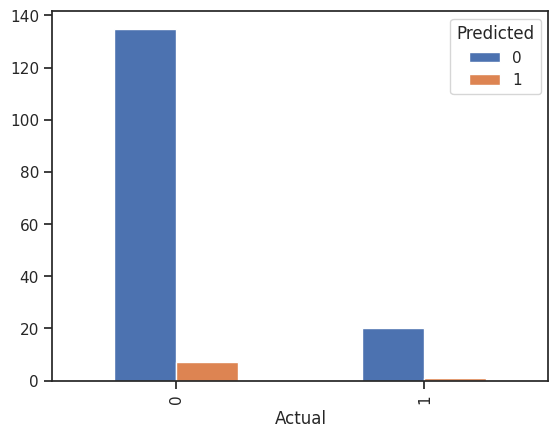

In [38]:
y_test_dt.rename('Actual', inplace=True)
series = pd.Series(pred_dt)
series.rename('Predicted',inplace=True)
CrosstabResult=pd.crosstab(index=y_test_dt,columns=series)
CrosstabResult.plot.bar()

---
## BaggingClassifier

Best BaggingClasifier found from exhaustive search

In [39]:
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X, y, test_size =0.2, random_state=3)
bg = BaggingClassifier(DecisionTreeClassifier(criterion='log_loss', splitter='random', max_depth=3, max_leaf_nodes=None))
bg.fit(X_train_bc, y_train_bc)
bg.score(X_test_bc, y_test_bc)
pred_bc = bg.predict(X_test_bc)
mer = metrics.precision_score(
 y_test_bc, pred_bc
)
mer

0.7

<AxesSubplot:xlabel='Actual'>

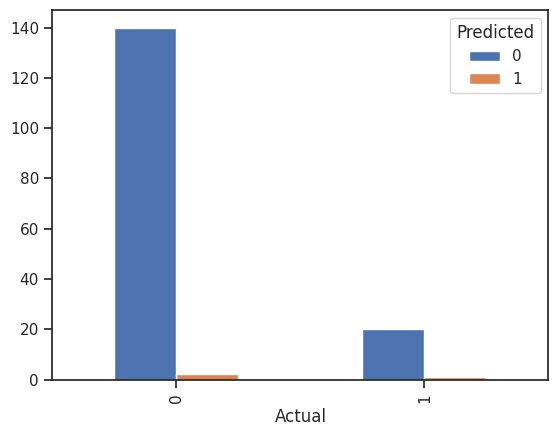

In [40]:
y_test_bc.rename('Actual', inplace=True)
series = pd.Series(pred_bc)
series.rename('Predicted',inplace=True)
CrosstabResult=pd.crosstab(index=y_test_bc,columns=series)
CrosstabResult.plot.bar()

---
## AdaBoostClassifier

Best model from AdaBoostClassifier exhaustive

In [41]:
X_train_ab, X_test_ab, y_train_ab, y_test_ab = train_test_split(X, y, test_size =0.2, random_state=3)
adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10, max_depth=4),
                                             n_estimators=25, learning_rate=10, algorithm='SAMME.R')
adb.fit(X_train_ab, y_train_ab)
adb.score(X_test_ab, y_test_ab)
pred_ab = adb.predict(X_test_ab)
mer = metrics.precision_score(
 y_test_ab, pred_ab
)
mer

0.8260869565217391

Visualizing Results

In [42]:
y_test_ab.rename('Actual', inplace=True)
series = pd.Series(pred_ab)
series.rename('Predicted',inplace=True)
CrosstabResult=pd.crosstab(index=y_test_ab,columns=series)
CrosstabResult.plot.bar()

<AxesSubplot:xlabel='Actual'>

---
## RandomForestClassifier

Best model for RandomForestClassifier exhaustive

In [43]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size =0.2, random_state=3)
rf = RandomForestClassifier(n_estimators=10, criterion='log_loss',max_depth=15,
                                                    max_features='log2', class_weight='balanced')
rf.fit(X_train_rf, y_train_rf)
pred_rf = rf.predict(X_test_rf)
mer = metrics.precision_score(
 y_test_rf, pred_rf)

mer

0.5178571428571429

Visualizing Results

In [44]:
y_test_rf.rename('Actual', inplace=True)
series = pd.Series(pred_rf)
series.rename('Predicted',inplace=True)
CrosstabResult=pd.crosstab(index=y_test_rf,columns=series)
CrosstabResult.plot.bar()

<AxesSubplot:xlabel='Actual'>

---
### All models performance

Code

Metrics

| Model      | Mean | High/Low     |
| :---        |    :----:   |          ---: |
| LogisticRegression      | 0.621212121212124       | 0.621212121212121 / 0.621212121212121   |
| LinearSVC   | 0.588706747180091        | 0.833333333333333 / 0.112195121951219      |
| KNeighborsClassifier   | 0.633333333333328        | 0.633333333333333 / 0.633333333333333      |
| DecisionTreeClassifier   | 0.610398680307512        | 0.9 / 0.421052631578947      |
| BaggingClassifier   | 0.668777947        | 0.84 / 0.5      |
| AdaBoostClassifier   | 0.798023722121466        | 0.833333333333333 / 0.631578947368421      |
| RandomForestClassifier   | 0.535015017324944        | 0.67391304347826 / 0.397058823529411      |

---
# Linear Regression arbitrary

In [45]:
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X, y, test_size =0.2, random_state=3)
lin = LinearRegression()
lin.fit(X_train_lin, y_train_lin)
pred_lin = lin.predict(X_test_lin)
series = pd.Series(pred_lin)
series[series>(max(series)-min(series))/2] = 1
series[series!=1] = 0
mer = metrics.precision_score(
y_test_lin, series)
mer

0.8

Visualizing Results

In [46]:
y_test_lin.rename('Actual', inplace=True)
series.rename('Predicted',inplace=True)
CrosstabResult=pd.crosstab(index=y_test_lin,columns=series)
CrosstabResult.plot.bar()

<AxesSubplot:xlabel='Actual'>